In [78]:
import pandas as pd
import numpy as np

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
dataset = pd.read_csv('/content/predictive_maintenance.csv')

In [81]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [82]:
dataset['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [83]:
dataset.describe().transpose()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [85]:
dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dataset['Type'] = label_encoder.fit_transform(dataset['Type'])
dataset['Failure Type'] = label_encoder.fit_transform(dataset['Failure Type'])


In [87]:
dataset.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['Air temperature [K]', 'Process temperature [k]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(
    dataset[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
)

In [89]:
print(dataset['Target'].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


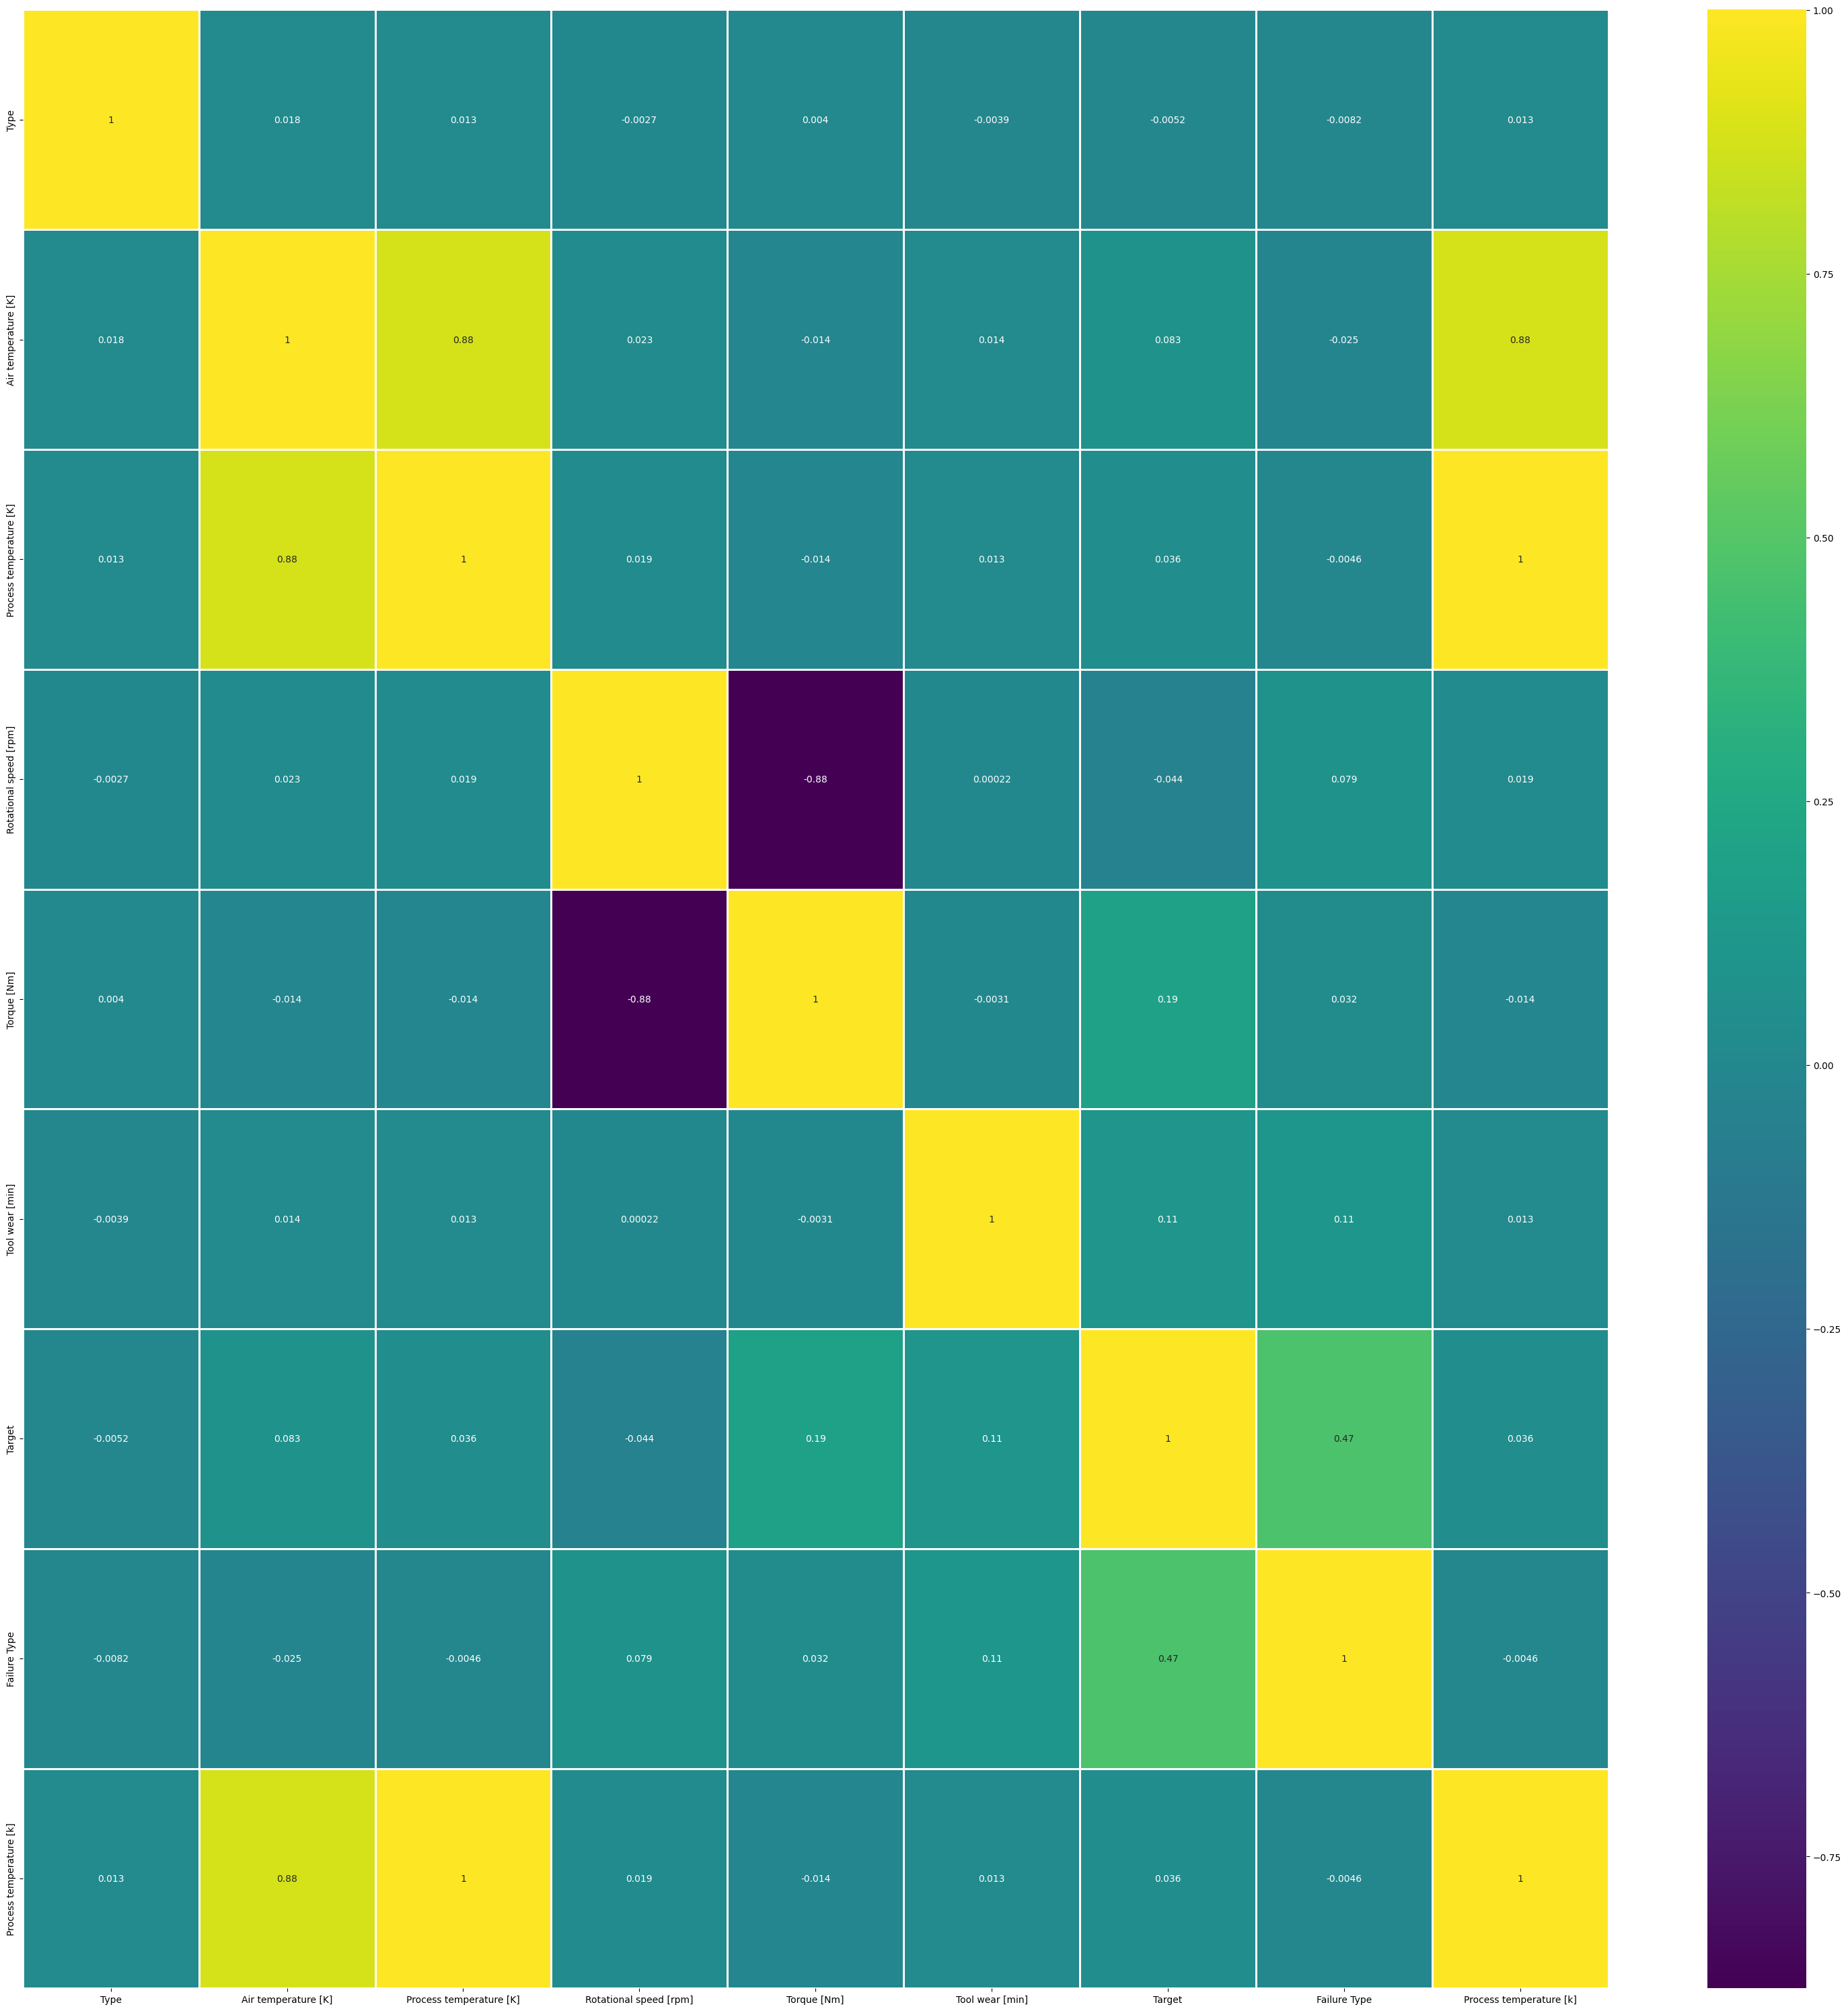

In [90]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True, linewidths=2, cmap='viridis')
plt.tight_layout()

In [91]:
corr.sort_index(ascending=True)

Type  Air temperature [K]  \
Air temperature [K]      0.017599             1.000000   
Failure Type            -0.008249            -0.025327   
Process temperature [K]  0.013444             0.876107   
Process temperature [k]  0.013444             0.876107   
Rotational speed [rpm]  -0.002693             0.022670   
Target                  -0.005152             0.082556   
Tool wear [min]         -0.003930             0.013853   
Torque [Nm]              0.004011            -0.013778   
Type                     1.000000             0.017599   

                         Process temperature [K]  Rotational speed [rpm]  \
Air temperature [K]                     0.876107                0.022670   
Failure Type                           -0.004600                0.079407   
Process temperature [K]                 1.000000                0.019277   
Process temperature [k]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Target                                  0.035946               -0.044188   
Tool wear [min]                         0.013488                0.000223   
Torque [Nm]                            -0.014061               -0.875027   
Type                                    0.013444               -0.002693   

                         Torque [Nm]  Tool wear [min]    Target  Failure Type  \
Air temperature [K]        -0.013778         0.013853  0.082556     -0.025327   
Failure Type                0.031737         0.111619  0.470541      1.000000   
Process temperature [K]    -0.014061         0.013488  0.035946     -0.004600   
Process temperature [k]    -0.014061         0.013488  0.035946     -0.004600   
Rotational speed [rpm]     -0.875027         0.000223 -0.044188      0.079407   
Target                      0.191321         0.105448  1.000000      0.470541   
Tool wear [min]            -0.003093         1.000000  0.105448      0.111619   
Torque [Nm]                 1.000000        -0.003093  0.191321      0.031737   
Type                        0.004011        -0.003930 -0.005152     -0.008249   

                         Process temperature [k]  
Air temperature [K]                     0.876107  
Failure Type                           -0.004600  
Process temperature [K]                 1.000000  
Process temperature [k]                 1.000000  
Rotational speed [rpm]                  0.019277  
Target                                  0.035946  
Tool wear [min]                         0.013488  
Torque [Nm]                            -0.014061  
Type                                    0.013444

## Data Visualization

---



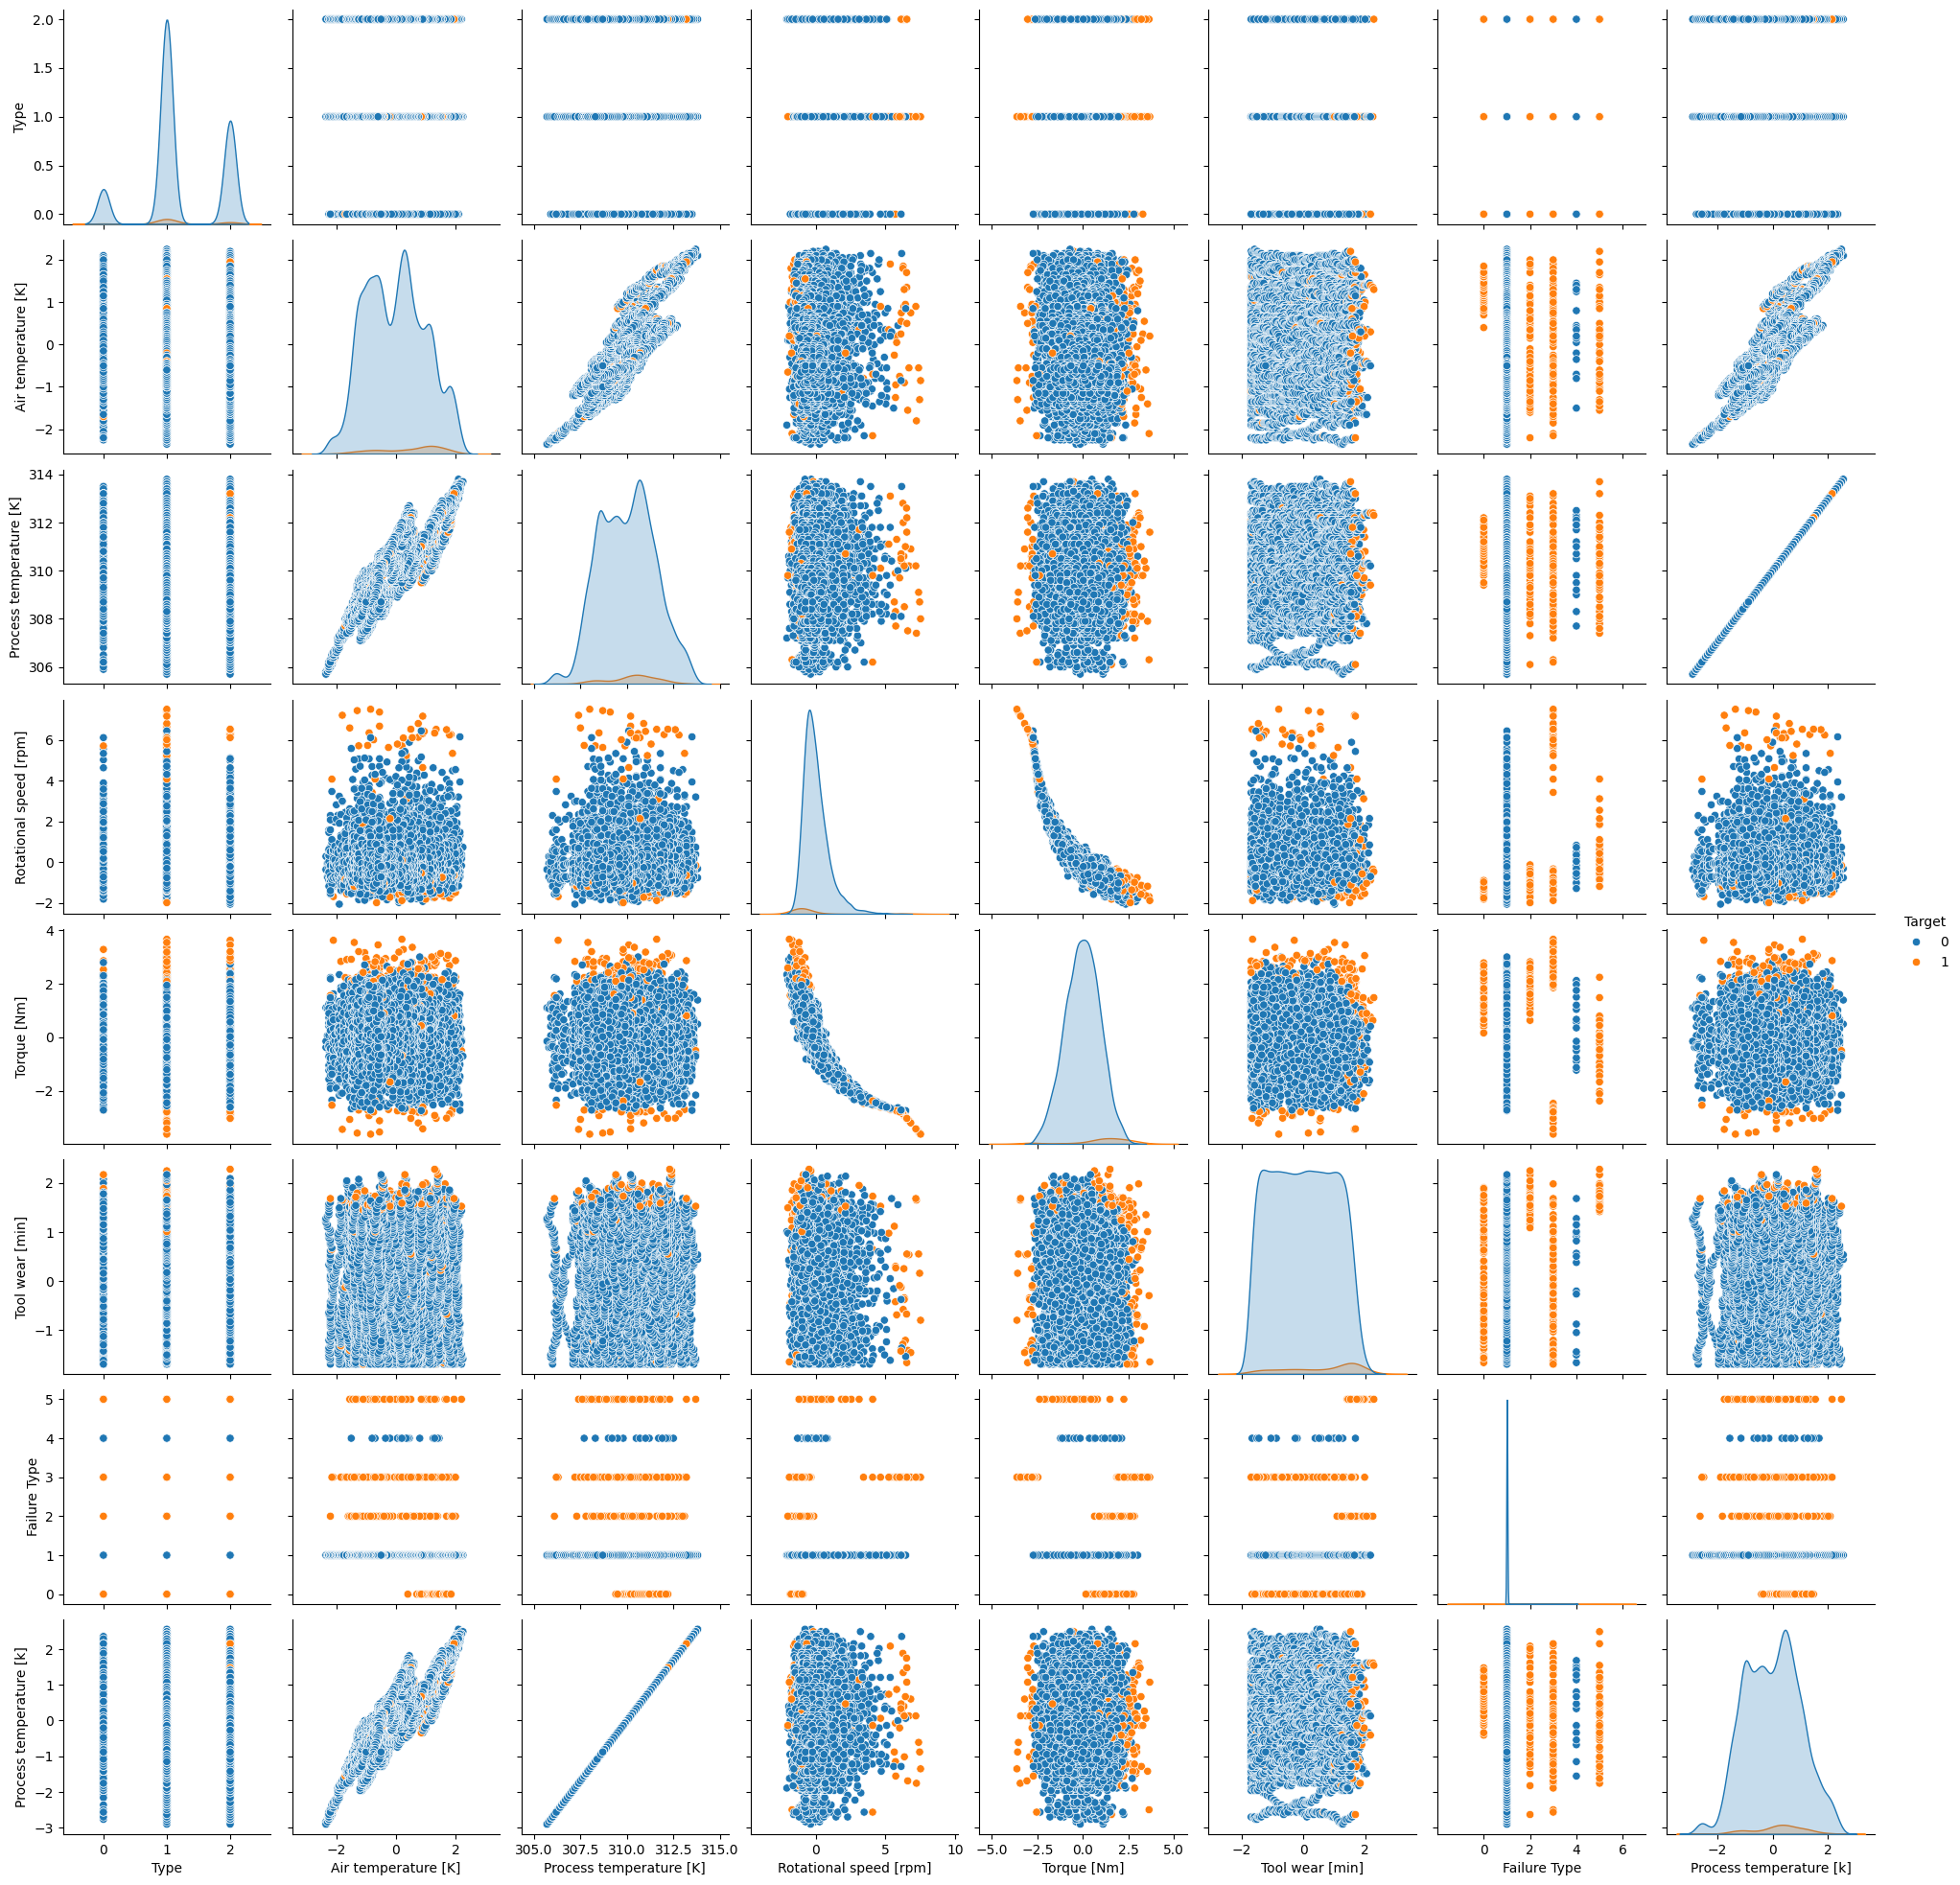

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset, hue="Target", diag_kind="kde")
plt.show()

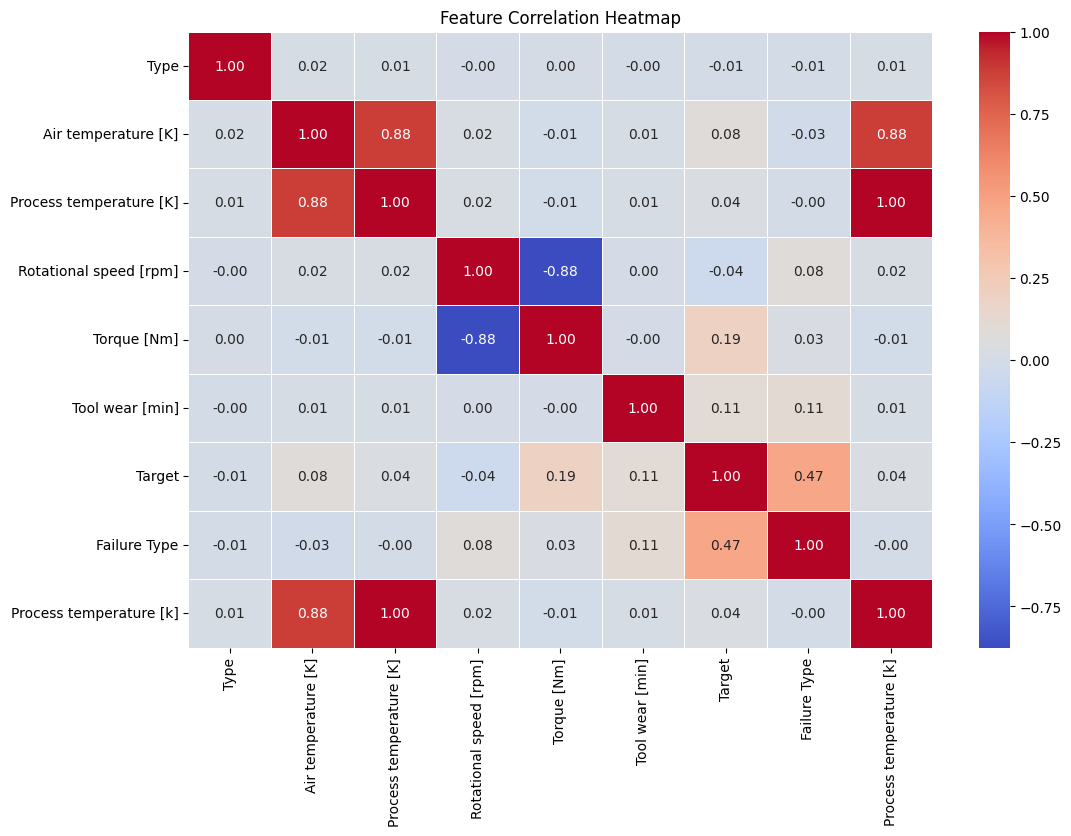

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

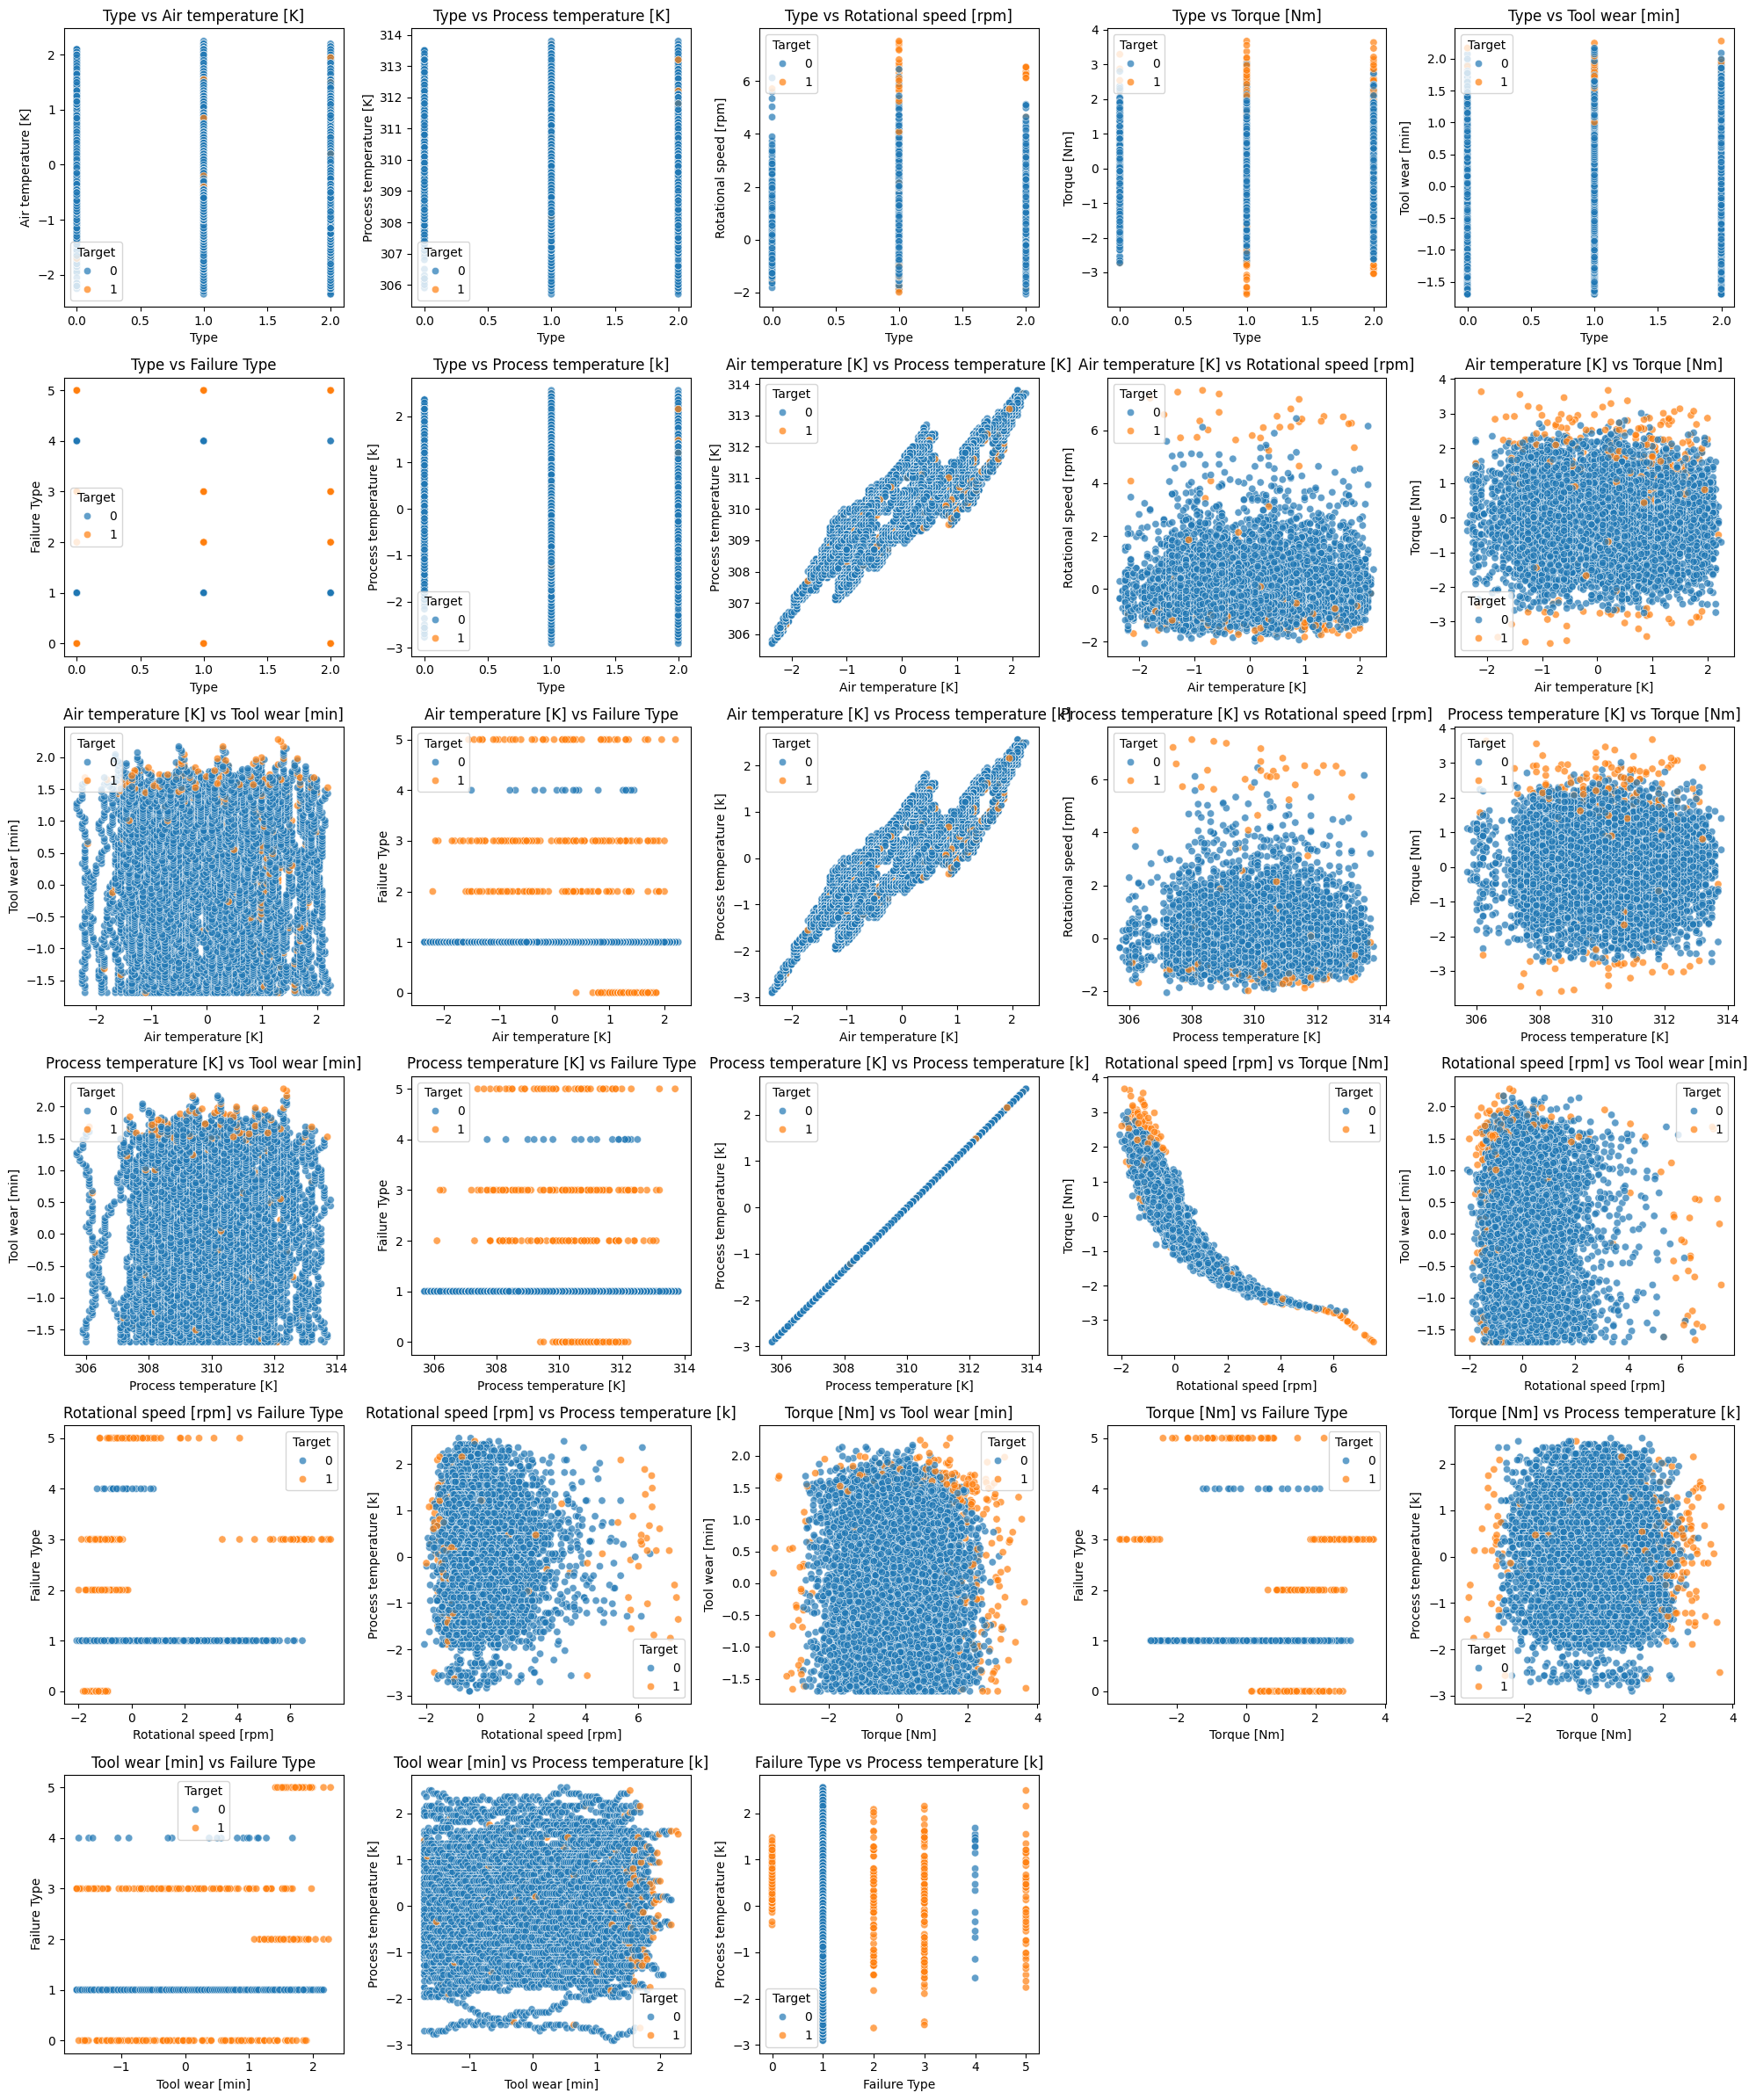

In [94]:
import itertools

dataset['Target'] = dataset['Target'].astype(str)

# Select numerical columns
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of combinations
n_combinations = len(list(itertools.combinations(num_cols, 2)))

# Dynamically determine grid size
n_rows = int(np.ceil(np.sqrt(n_combinations)))
n_cols = int(np.ceil(n_combinations / n_rows))

# Create figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Plot scatterplots
for i, (col1, col2) in enumerate(itertools.combinations(num_cols, 2), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=dataset, x=col1, y=col2, hue="Target", alpha=0.7)
    plt.title(f"{col1} vs {col2}")

plt.tight_layout()
plt.show()


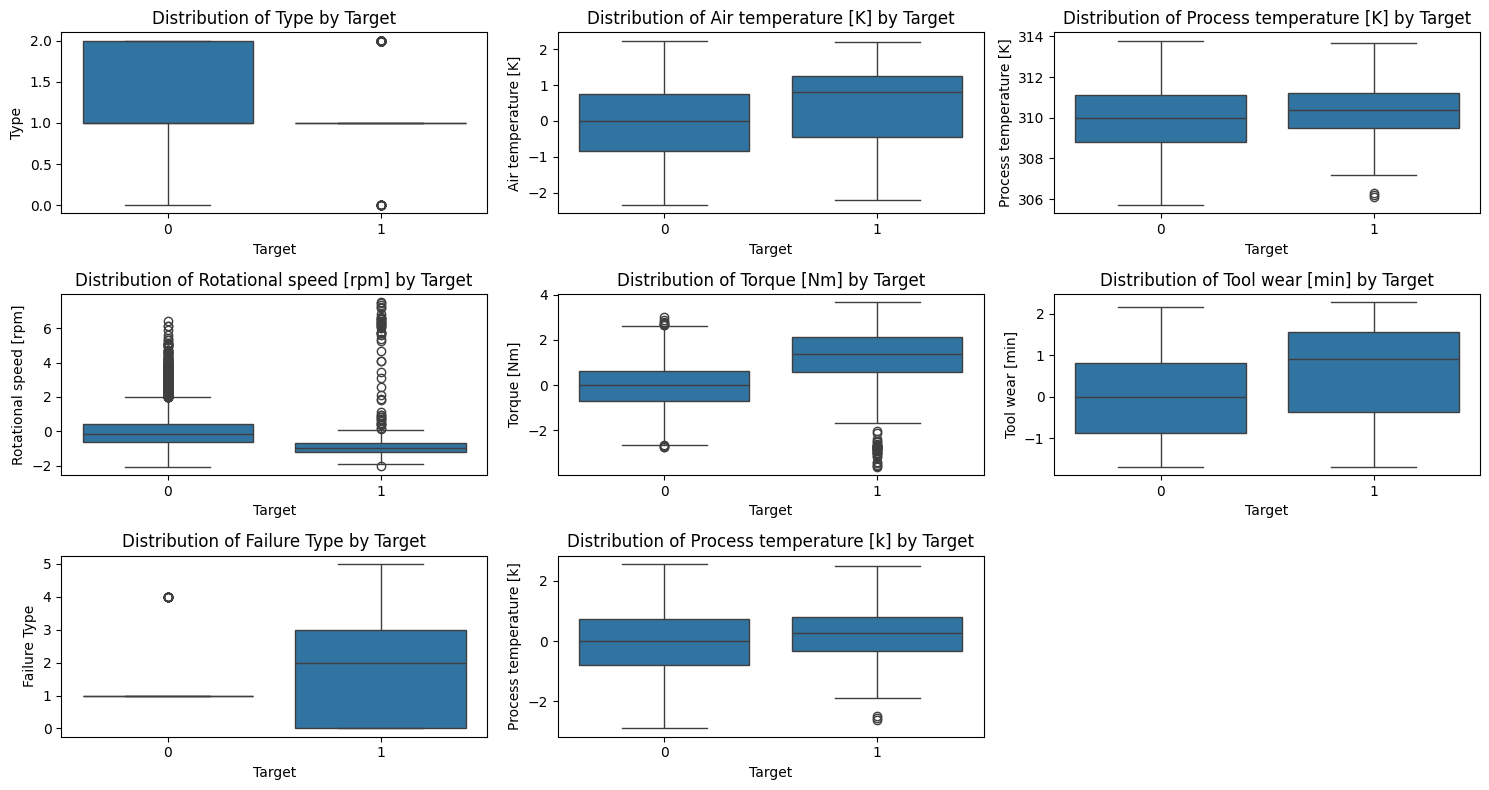

In [95]:
dataset.columns = dataset.columns.str.strip()
dataset['Target']=dataset['Target'].astype(str)

plt.figure(figsize=(15,8))
for i, col in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=dataset, x= "Target", y=col)
    plt.title(f"Distribution of {col} by Target")

plt.tight_layout()
plt.show()

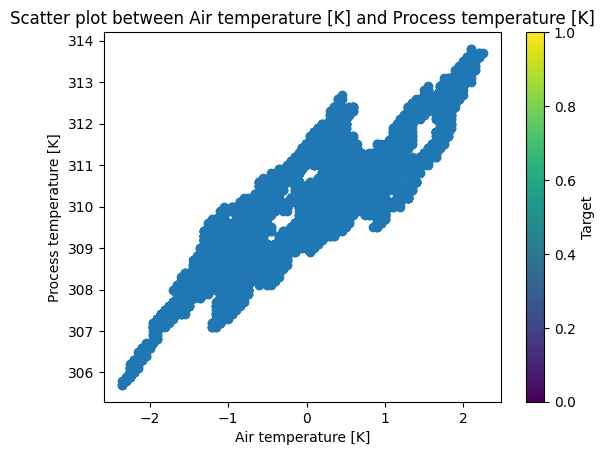

In [96]:
plt.scatter(dataset['Air temperature [K]'], dataset['Process temperature [K]'])
plt.title('Scatter plot between Air temperature [K] and Process temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.colorbar(label='Target')
plt.show()

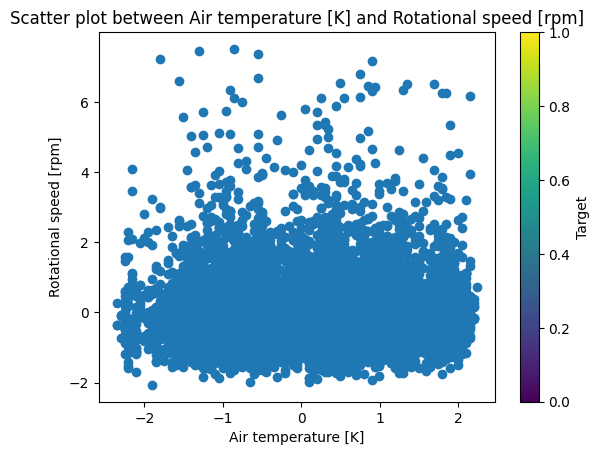

In [97]:
plt.scatter(dataset['Air temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Air temperature [K] and Rotational speed [rpm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

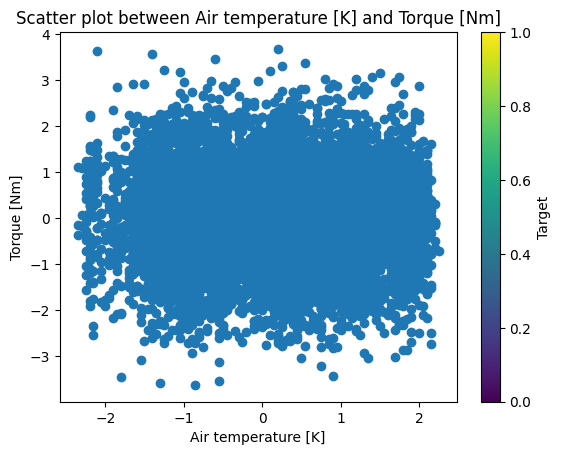

In [98]:
plt.scatter(dataset['Air temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Air temperature [K] and Torque [Nm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

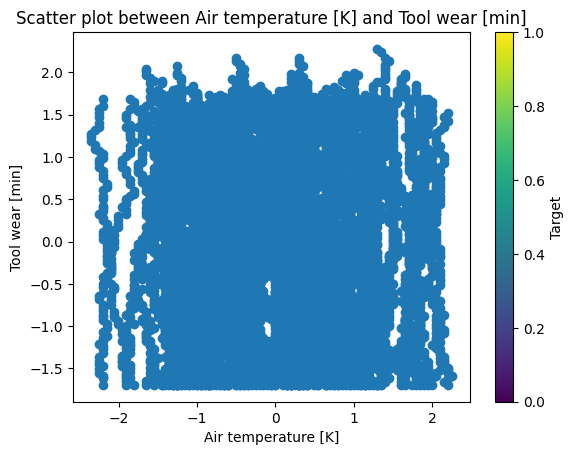

In [99]:
plt.scatter(dataset['Air temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Air temperature [K] and Tool wear [min]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

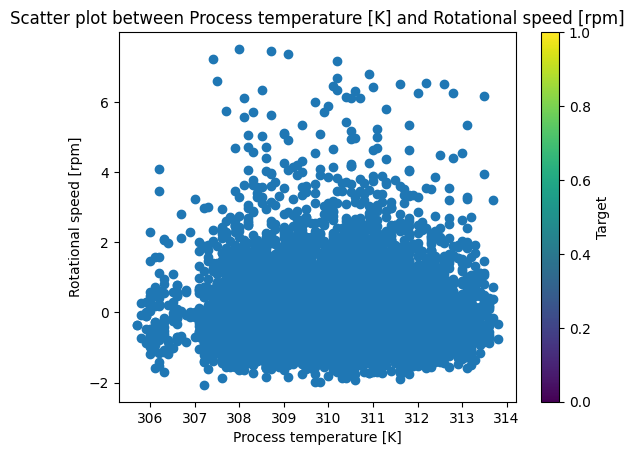

In [100]:
plt.scatter(dataset['Process temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Process temperature [K] and Rotational speed [rpm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

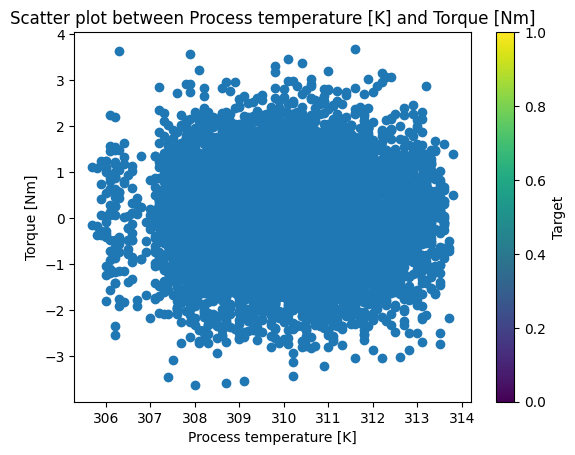

In [101]:
plt.scatter(dataset['Process temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Process temperature [K] and Torque [Nm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

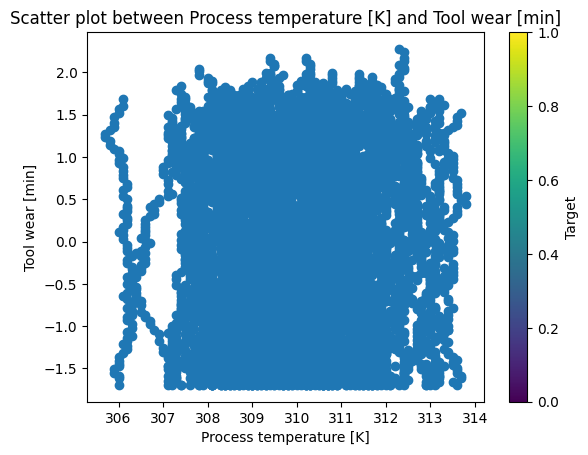

In [102]:
plt.scatter(dataset['Process temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Process temperature [K] and Tool wear [min]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

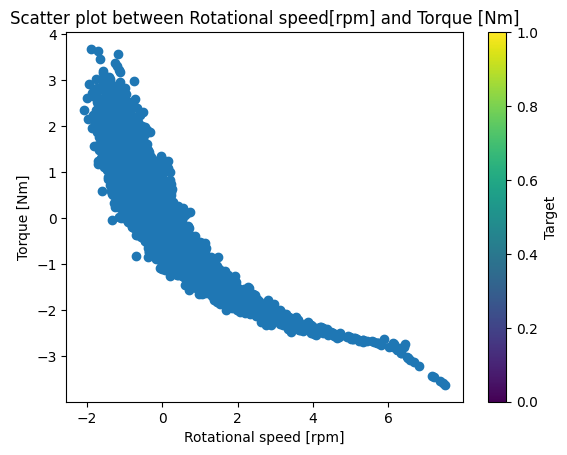

In [103]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Rotational speed[rpm] and Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

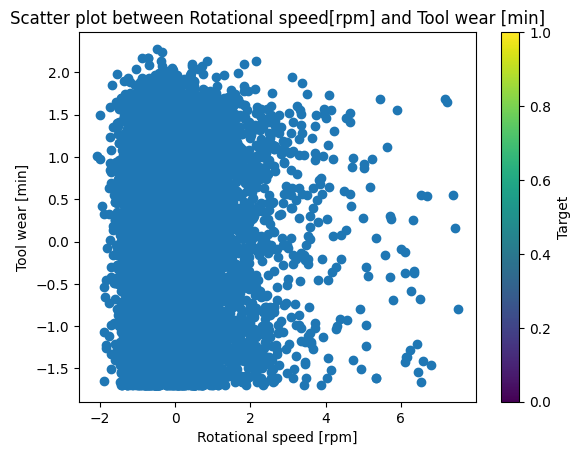

In [104]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Rotational speed[rpm] and Tool wear [min]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

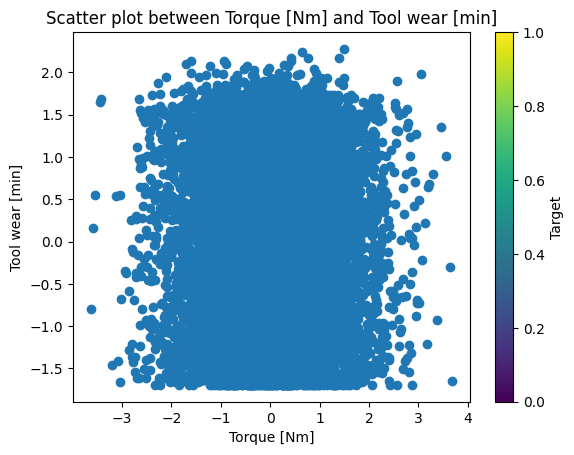

In [105]:
plt.scatter(dataset['Torque [Nm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Torque [Nm] and Tool wear [min]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

<Axes: xlabel='Target'>

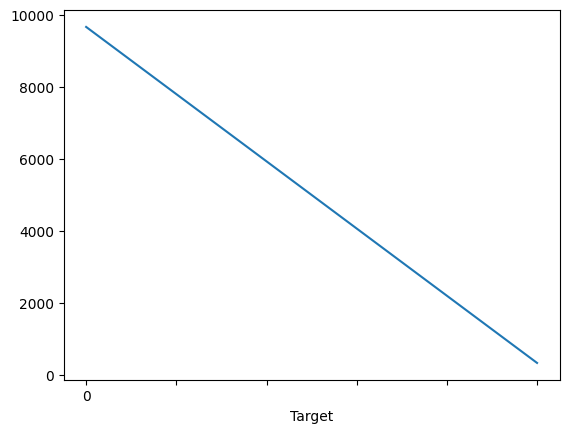

In [106]:
dataset['Target'].value_counts().plot()

<ipython-input-107-00bfe1aaf141>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Target'], palette='bright')


<Axes: xlabel='Target', ylabel='count'>

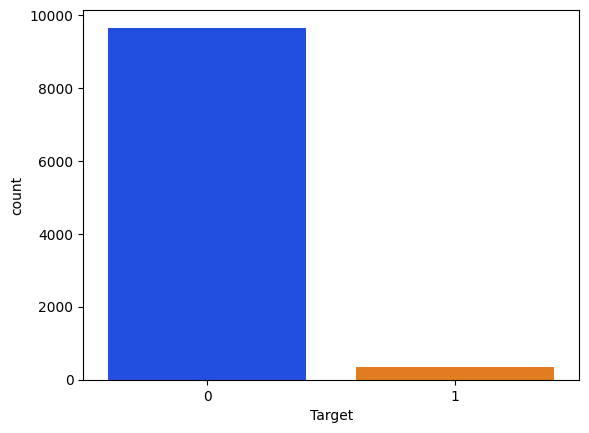

In [107]:
sns.countplot(x=dataset['Target'], palette='bright')

## Feature Selection

---



In [108]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                    308.6                0.068185   
1     1            -0.902393                    308.7               -0.729472   
2     1            -0.952389                    308.5               -0.227450   
3     1            -0.902393                    308.6               -0.590021   
4     1            -0.902393                    308.7               -0.729472   

   Torque [Nm]  Tool wear [min] Target  Failure Type  Process temperature [k]  
0     0.282200        -1.695984      0             1                -0.947360  
1     0.633308        -1.648852      0             1                -0.879959  
2     0.944290        -1.617430      0             1                -1.014761  
3    -0.048845        -1.586009      0             1                -0.947360  
4     0.001313        -1.554588      0             1                -0.879959

In [109]:
dataset.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'Process temperature [k]'],
      dtype='object')

In [110]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Failure Type'] = encoder.fit_transform(dataset['Failure Type'])

print(dataset['Failure Type'].value_counts())

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


In [111]:
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

In [112]:
correlation_with_target = numeric_df.corr()['Failure Type'].sort_values(ascending=False)

In [113]:
print(correlation_with_target)

Failure Type               1.000000
Tool wear [min]            0.111619
Rotational speed [rpm]     0.079407
Torque [Nm]                0.031737
Process temperature [K]   -0.004600
Process temperature [k]   -0.004600
Type                      -0.008249
Air temperature [K]       -0.025327
Name: Failure Type, dtype: float64


<ipython-input-114-ea8212cc1b30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


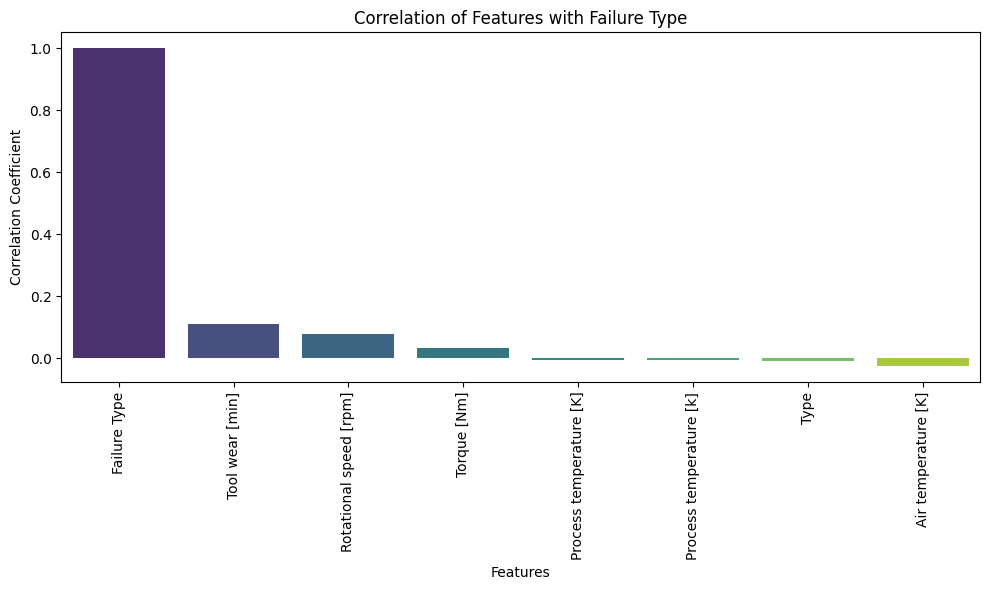

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f"Correlation of Features with Failure Type")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [115]:
columns_to_drop = ['Type','Target']

In [116]:
dataset = dataset.drop(columns=columns_to_drop)

In [117]:
dataset.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.952389                    308.6                0.068185   
1            -0.902393                    308.7               -0.729472   
2            -0.952389                    308.5               -0.227450   
3            -0.902393                    308.6               -0.590021   
4            -0.902393                    308.7               -0.729472   

   Torque [Nm]  Tool wear [min]  Failure Type  Process temperature [k]  
0     0.282200        -1.695984             1                -0.947360  
1     0.633308        -1.648852             1                -0.879959  
2     0.944290        -1.617430             1                -1.014761  
3    -0.048845        -1.586009             1                -0.947360  
4     0.001313        -1.554588             1                -0.879959

In [118]:
columns_to_drop = ['Process temperature [K]']
data = dataset.drop(columns=columns_to_drop)

In [119]:
data.columns

Index(['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Failure Type', 'Process temperature [k]'],
      dtype='object')

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Rotational speed [rpm]   10000 non-null  float64
 2   Torque [Nm]              10000 non-null  float64
 3   Tool wear [min]          10000 non-null  float64
 4   Failure Type             10000 non-null  int64  
 5   Process temperature [k]  10000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


## Data Normalization

---



In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
X=data.drop('Failure Type', axis=1)
y=data['Failure Type']

In [123]:
scaler=StandardScaler()

In [124]:
X_scaled=scaler.fit_transform(X)

In [125]:
X_scaled

array([[-0.95238944,  0.06818514,  0.28219976, -1.69598374, -0.94735989],
       [-0.90239341, -0.72947151,  0.63330802, -1.6488517 , -0.879959  ],
       [-0.95238944, -0.22744984,  0.94428963, -1.61743034, -1.01476077],
       ...,
       [-0.50242514,  0.59251888, -0.66077672, -1.35034876, -0.94735989],
       [-0.50242514, -0.72947151,  0.85400464, -1.30321671, -0.879959  ],
       [-0.50242514, -0.2162938 ,  0.02137647, -1.22466331, -0.879959  ]])

In [126]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Failure Type, Length: 10000, dtype: int64

# Model Train "Failure Type" as a Target Column

## Train Test Split

---



In [127]:
from sklearn.model_selection import train_test_split

In [128]:
data['Failure Type'].value_counts()

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [130]:
print(pd.Series(y_train).value_counts())

Failure Type
1    6756
0      78
3      67
2      55
5      31
4      13
Name: count, dtype: int64


Text(0, 0.5, 'Count')

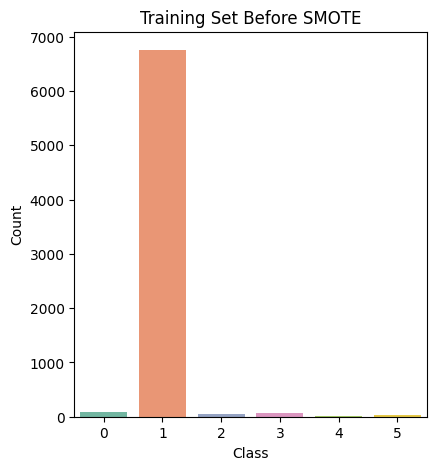

In [131]:
# Plot class distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=pd.Series(y_train), hue=pd.Series(y_train), palette='Set2', legend=False)
plt.title('Training Set Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
# Apply SMOTE to training set
smote = SMOTE(sampling_strategy={0: 6763, 1: 6763 , 2: 6763, 3: 6763, 4: 6763 , 5: 6763}, random_state=42)  # Match class 0's count in training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [134]:
print(pd.Series(y_train_smote).value_counts())

Failure Type
1    6763
0    6763
5    6763
3    6763
2    6763
4    6763
Name: count, dtype: int64


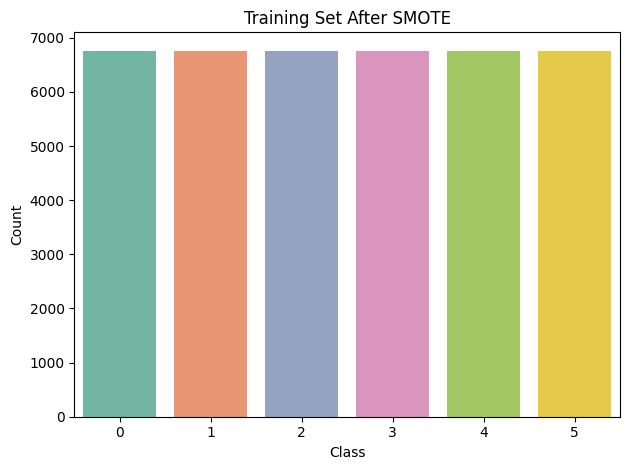

In [135]:
# Plot class distribution after SMOTE
sns.countplot(x=pd.Series(y_train_smote), hue=pd.Series(y_train_smote), palette='Set2', legend=False)
plt.title('Training Set After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [136]:
X_train = X_train_smote
y_train = y_train_smote

## Implement Ensemble Models

---



In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [138]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_multiclass(y_true, y_pred, y_proba):
    report = classification_report(y_true, y_pred, output_dict=True)

    metrics = {
        "Accuracy": report['accuracy'],
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1 Score (Macro)": report['macro avg']['f1-score'],
        "ROC AUC Score (Macro)": roc_auc_score(y_true, y_proba, multi_class="ovr")  # One-vs-Rest
    }
    return metrics

### Bagging

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Decision Tree

In [140]:
tree_model = DecisionTreeClassifier(random_state=42)

In [141]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [142]:
tree_pred_prob = tree_model.predict(X_test)

In [143]:
print(classification_report(y_test,tree_pred_prob))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        34
           1       0.99      0.96      0.97      2896
           2       0.38      0.52      0.44        23
           3       0.81      0.75      0.78        28
           4       0.00      0.00      0.00         5
           5       0.07      0.21      0.11        14

    accuracy                           0.95      3000
   macro avg       0.48      0.55      0.51      3000
weighted avg       0.97      0.95      0.96      3000



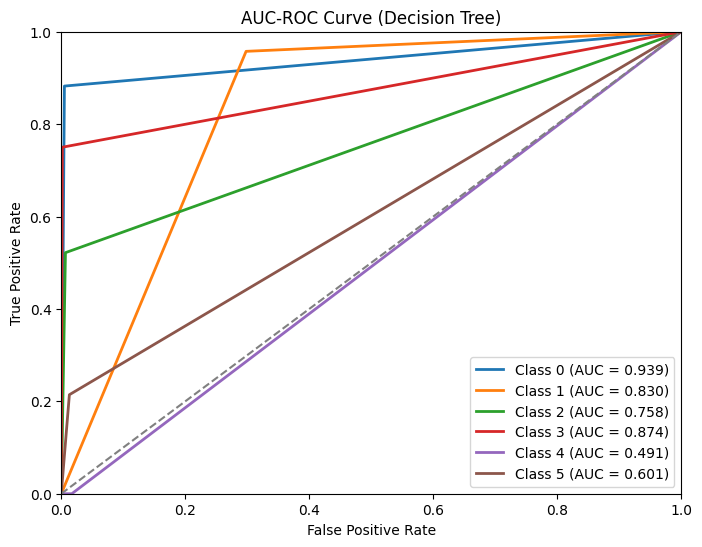

In [144]:
num_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

tree_pred_prob = tree_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], tree_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

Decision Tree with Bagging

In [145]:
tree_bagging = BaggingClassifier(estimator=tree_model, n_estimators=10, random_state=42)

In [146]:
tree_bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [147]:
tree_bagging_pred = tree_bagging.predict(X_test)

In [148]:
print(classification_report(y_test, tree_bagging_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        34
           1       0.99      0.96      0.98      2896
           2       0.42      0.70      0.52        23
           3       0.83      0.86      0.84        28
           4       0.00      0.00      0.00         5
           5       0.11      0.29      0.15        14

    accuracy                           0.95      3000
   macro avg       0.51      0.61      0.55      3000
weighted avg       0.98      0.95      0.96      3000



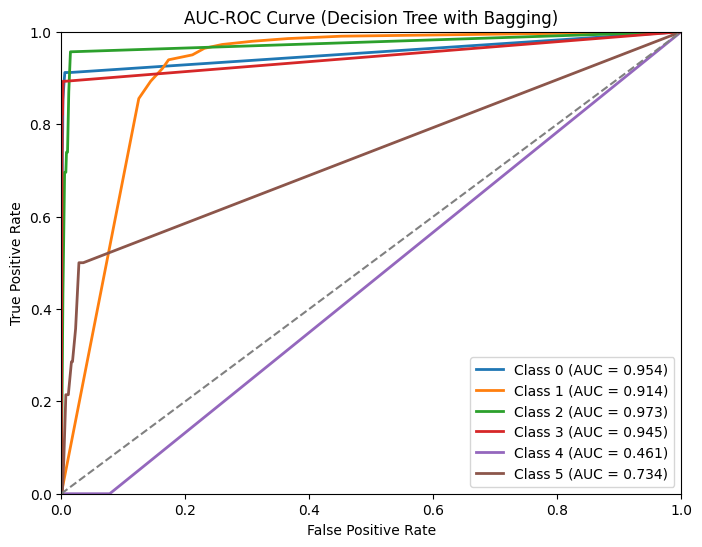

In [149]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs = tree_bagging.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Decision Tree with Bagging)')
plt.legend(loc='lower right')
plt.show()

In [150]:
metrics = evaluate_multiclass(y_test, tree_bagging_pred, y_probs)
print(metrics)

{'Accuracy': 0.9543333333333334, 'Precision (Macro)': 0.5071740997348239, 'Recall (Macro)': 0.6139857906890837, 'F1 Score (Macro)': 0.5461360224834817, 'ROC AUC Score (Macro)': np.float64(0.8302430704696038)}


<Axes: >

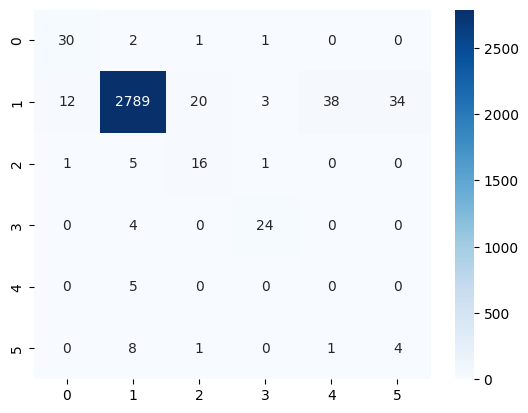

In [151]:
cm = confusion_matrix(y_test, tree_bagging_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Grid Search CV

In [152]:
param_grid = {
    'n_estimators': [10,50,100],
    'estimator__max_depth': [5,10,20],
    'estimator__min_samples_split': [2,5,10],
    'estimator__min_samples_leaf': [1,2,4]
}

In [153]:
grid_search = GridSearchCV(tree_bagging,param_grid,scoring='f1_weighted', cv=3,n_jobs=-1)

In [154]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [5, 10, 20],
                         'estimator__min_samples_leaf': [1, 2, 4],
                         'estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='f1_weighted')

In [155]:
best_model = grid_search.best_estimator_

In [156]:
tree_bagging_pred_cv = best_model.predict(X_test)

In [157]:
print(classification_report(y_test,tree_bagging_pred_cv))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        34
           1       0.99      0.94      0.96      2896
           2       0.44      0.74      0.55        23
           3       0.81      0.79      0.80        28
           4       0.00      0.00      0.00         5
           5       0.08      0.29      0.12        14

    accuracy                           0.93      3000
   macro avg       0.50      0.60      0.53      3000
weighted avg       0.98      0.93      0.95      3000



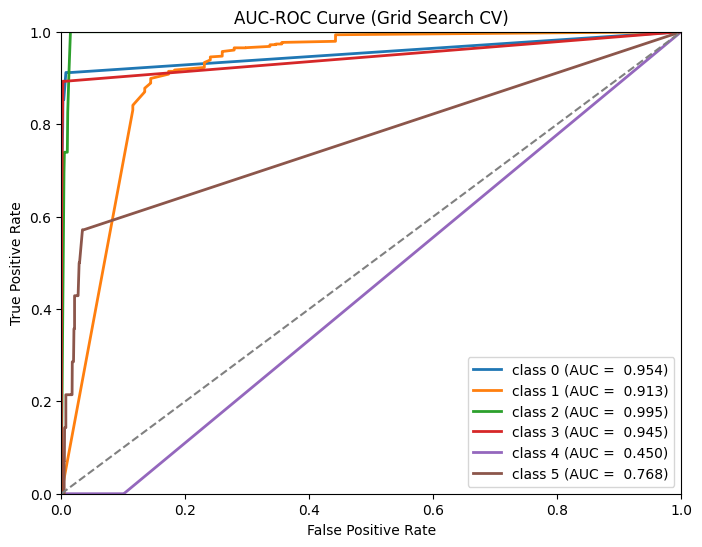

In [158]:
y_test_bin = label_binarize(y_test,classes=grid_search.best_estimator_.classes_)

y_probs = grid_search.best_estimator_.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):
  fpr,tpr, _ = roc_curve(y_test_bin[:,i],y_probs[:,i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr,lw=2, label=f'class {i} (AUC = {roc_auc: .3f})')

plt.plot([0,1],[0,1], color='gray', linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Grid Search CV)')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [159]:
forest_model = RandomForestClassifier(random_state=42)

In [160]:
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [161]:
forest_pred = forest_model.predict(X_test)

In [162]:
print(classification_report(y_test, forest_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75        34
           1       0.99      0.97      0.98      2896
           2       0.55      0.78      0.64        23
           3       0.68      0.75      0.71        28
           4       0.00      0.00      0.00         5
           5       0.08      0.21      0.12        14

    accuracy                           0.96      3000
   macro avg       0.50      0.59      0.53      3000
weighted avg       0.97      0.96      0.97      3000



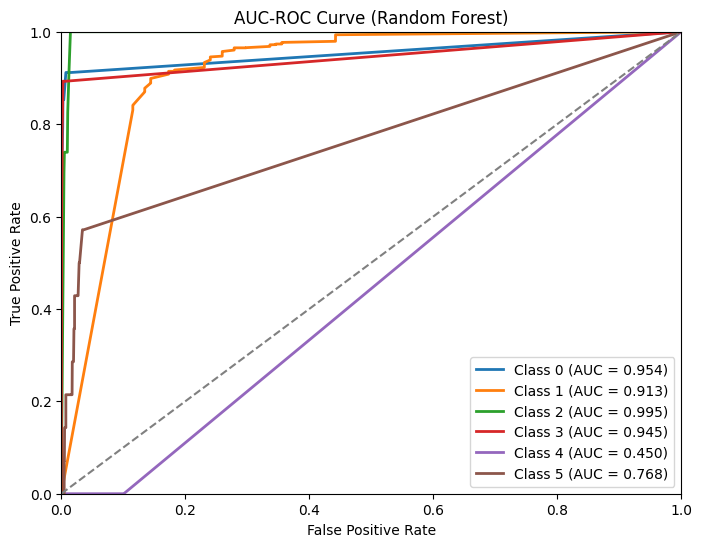

In [163]:
num_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

Random Forest with Bagging

In [164]:
forest_bagging = BaggingClassifier(estimator=forest_model,n_estimators=10,random_state=42)

In [165]:
forest_bagging.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [166]:
forest_bagging_pred = forest_bagging.predict(X_test)

In [167]:
print(classification_report(y_test,forest_bagging_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        34
           1       0.99      0.95      0.97      2896
           2       0.44      0.78      0.56        23
           3       0.62      0.86      0.72        28
           4       0.00      0.00      0.00         5
           5       0.07      0.21      0.10        14

    accuracy                           0.95      3000
   macro avg       0.46      0.62      0.52      3000
weighted avg       0.97      0.95      0.96      3000



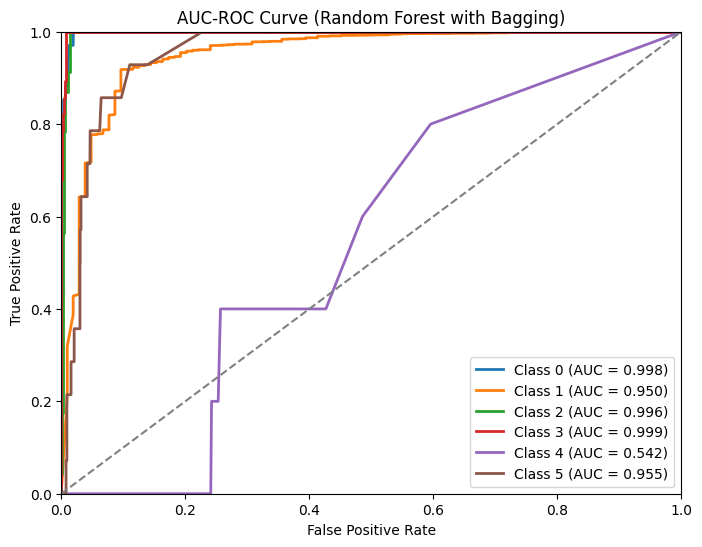

In [168]:
y_probs = forest_bagging.predict_proba(X_test)

num_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test,classes=np.unique(y))

plt.figure(figsize=(8,6))


for i in range(num_classes):
  fpr, tpr, _ =roc_curve(y_test_bin[:,i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc :.3f})')

plt.plot([0,1],[0,1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest with Bagging)')
plt.legend(loc='lower right')
plt.show()

In [169]:
metrics = evaluate_multiclass(y_test, forest_bagging_pred, y_probs)
print(metrics)

{'Accuracy': 0.946, 'Precision (Macro)': 0.4582781176235576, 'Recall (Macro)': 0.6150774656487625, 'F1 Score (Macro)': 0.5153672549587313, 'ROC AUC Score (Macro)': np.float64(0.9065341285687323)}


<Axes: >

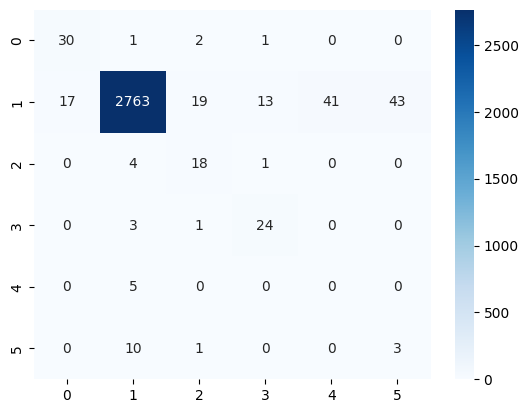

In [170]:
cm = confusion_matrix(y_test, forest_bagging_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Hyperparameter Tuning for Random Forest

In [171]:
from sklearn.model_selection import RandomizedSearchCV

In [172]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2']
}

In [173]:
forest_model = RandomForestClassifier(random_state=42)

In [174]:
Random_search = RandomizedSearchCV(
    estimator=forest_model,param_distributions = param_grid,
    n_iter=10, cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [175]:
Random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1_weighted')

In [176]:
best_params = Random_search.best_params_

In [177]:
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [178]:
forest_model_best = RandomForestClassifier(**best_params, random_state=42)

In [179]:
forest_bagging = BaggingClassifier(estimator=forest_model_best, n_estimators=10, random_state=42)

In [180]:
forest_bagging.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [181]:
forest_bagging_pred = forest_bagging.predict(X_test)

In [182]:
print(classification_report(y_test, forest_bagging_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        34
           1       0.99      0.95      0.97      2896
           2       0.44      0.78      0.56        23
           3       0.62      0.86      0.72        28
           4       0.00      0.00      0.00         5
           5       0.07      0.21      0.10        14

    accuracy                           0.95      3000
   macro avg       0.46      0.62      0.52      3000
weighted avg       0.97      0.95      0.96      3000



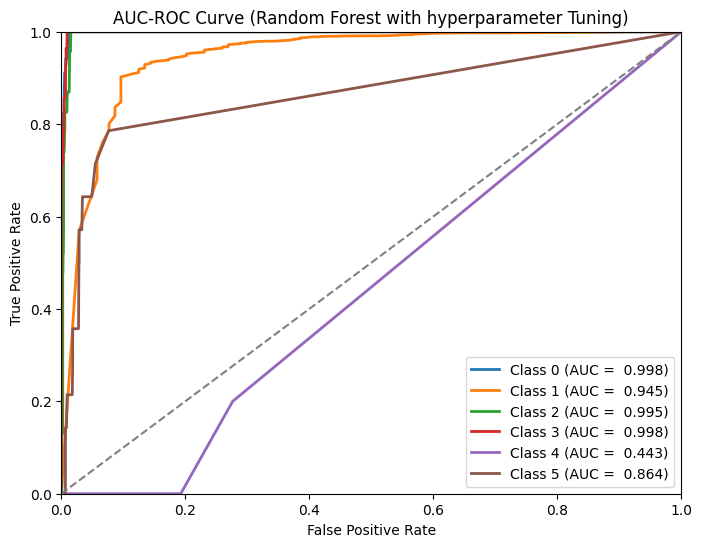

In [183]:
best_rf = Random_search.best_estimator_

y_probs = best_rf.predict_proba(X_test)

y_test_bin = label_binarize(y_test,classes=np.unique(y))
plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:,i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc: .3f})')

plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest with hyperparameter Tuning)')
plt.legend(loc='lower right')
plt.show()

## Boosting

In [184]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.multiclass import OneVsRestClassifier

In [185]:
model = AdaBoostClassifier(n_estimators=10, learning_rate=1)

In [186]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10)

In [187]:
y_pred_adaboost = model.predict(X_test)

In [188]:
print(classification_report(y_test,y_pred_adaboost,zero_division=0))

              precision    recall  f1-score   support

           0       0.05      0.03      0.04        34
           1       0.58      0.00      0.01      2896
           2       0.06      0.91      0.11        23
           3       0.39      0.61      0.47        28
           4       0.00      1.00      0.00         5
           5       0.00      0.00      0.00        14

    accuracy                           0.02      3000
   macro avg       0.18      0.43      0.10      3000
weighted avg       0.56      0.02      0.01      3000



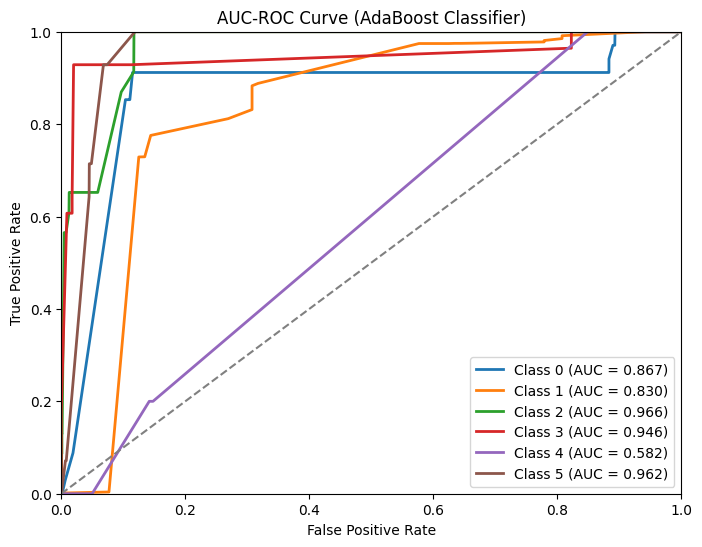

In [189]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs = model.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (AdaBoost Classifier)')
plt.legend(loc='lower right')
plt.show()

In [190]:
metrics = evaluate_multiclass(y_test, y_pred_adaboost, y_probs)
print(metrics)

{'Accuracy': 0.018333333333333333, 'Precision (Macro)': 0.1790306495468791, 'Recall (Macro)': 0.42556607377517425, 'F1 Score (Macro)': 0.10464437444202279, 'ROC AUC Score (Macro)': np.float64(0.8589431611139232)}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

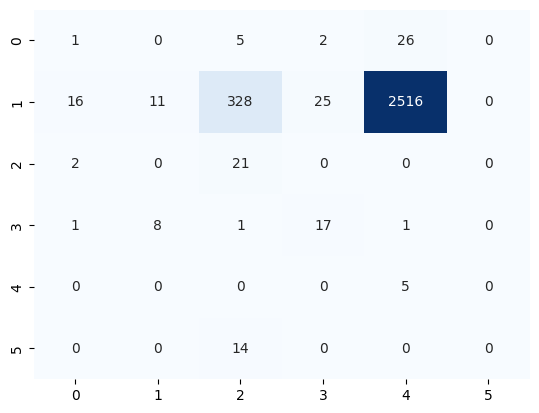

In [191]:
cm = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

Hyperparameter Tuning

In [192]:
param_grid = {
    'n_estimators': [50,100,200,500],
    'learning_rate': [0.01,0.1,0.5,1],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=3)]
}

In [193]:
ada_model = AdaBoostClassifier(random_state=42)

In [194]:
random_search = RandomizedSearchCV(
    estimator=ada_model,param_distributions=param_grid,
    n_iter=10,cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [195]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='f1_weighted')

In [196]:
best_params = random_search.best_params_
print("Best Hyperparameters :", best_params)

Best Hyperparameters : {'n_estimators': 50, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3)}


In [197]:
model_best = AdaBoostClassifier(**best_params,random_state=42)
model_best.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, random_state=42)

In [198]:
y_pred_adaboost = model_best.predict(X_test)

In [199]:
print(classification_report(y_test,y_pred_adaboost, zero_division=0))

              precision    recall  f1-score   support

           0       0.54      0.91      0.68        34
           1       1.00      0.84      0.91      2896
           2       0.42      1.00      0.59        23
           3       0.71      0.89      0.79        28
           4       0.00      0.00      0.00         5
           5       0.08      0.57      0.14        14

    accuracy                           0.84      3000
   macro avg       0.46      0.70      0.52      3000
weighted avg       0.98      0.84      0.90      3000



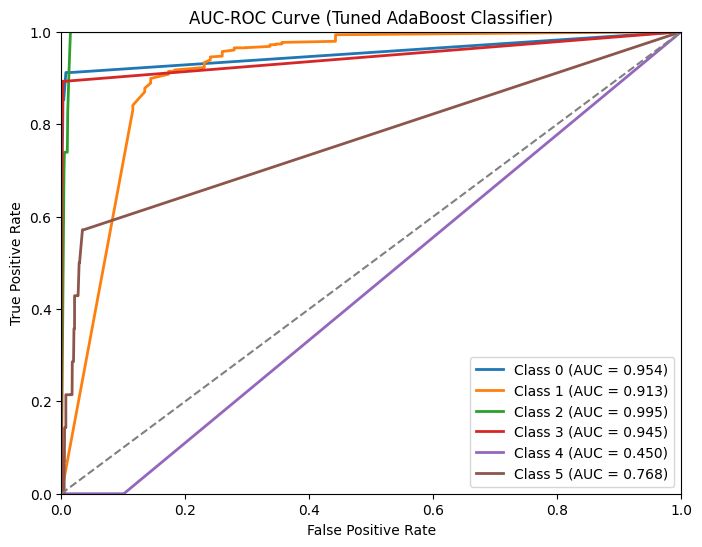

In [200]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs = best_model.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Tuned AdaBoost Classifier)')
plt.legend(loc='lower right')
plt.show()

In [201]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [202]:
base_tree = DecisionTreeClassifier(max_depth=3, class_weight=class_weight_dict, random_state=42)

In [203]:
model = AdaBoostClassifier(estimator=base_tree, n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight={0: np.float64(1.0),
                                                                  1: np.float64(1.0),
                                                                  2: np.float64(1.0),
                                                                  3: np.float64(1.0),
                                                                  4: np.float64(1.0),
                                                                  5: np.float64(1.0)},
                                                    max_depth=3,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [204]:
y_pred = model.predict(X_test)

In [205]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.34      0.88      0.49        34
           1       0.99      0.74      0.85      2896
           2       0.35      1.00      0.52        23
           3       0.58      0.89      0.70        28
           4       0.00      0.00      0.00         5
           5       0.07      0.64      0.12        14

    accuracy                           0.74      3000
   macro avg       0.39      0.69      0.45      3000
weighted avg       0.97      0.74      0.83      3000



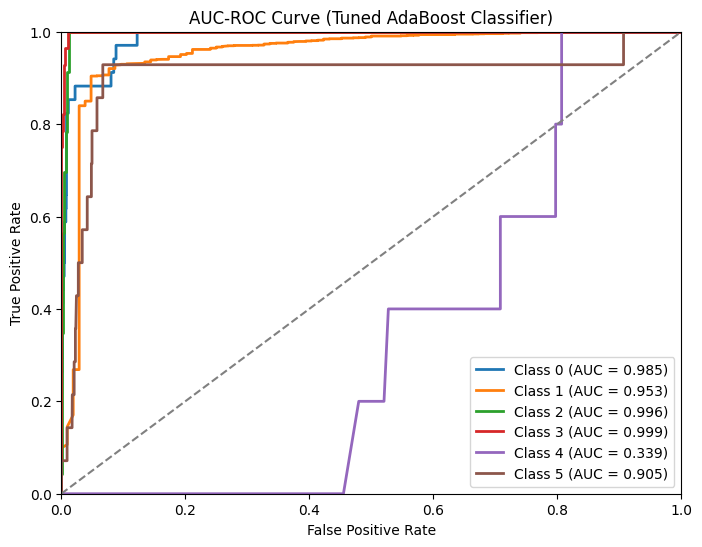

In [206]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
num_classes = y_test_bin.shape[1]

y_probs = model.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Tuned AdaBoost Classifier)')
plt.legend(loc='lower right')
plt.show()

Using Different Base Learners SVC

In [207]:
from sklearn.svm import SVC

In [208]:
svc = SVC(probability=True, kernel='linear')

In [209]:
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [210]:
y_pred_svc = svc.predict(X_test)

In [211]:
print("Accuracy: ", accuracy_score(y_test,y_pred_svc))

Accuracy:  0.674


In [212]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.34      0.88      0.49        34
           1       0.99      0.74      0.85      2896
           2       0.35      1.00      0.52        23
           3       0.58      0.89      0.70        28
           4       0.00      0.00      0.00         5
           5       0.07      0.64      0.12        14

    accuracy                           0.74      3000
   macro avg       0.39      0.69      0.45      3000
weighted avg       0.97      0.74      0.83      3000



In [213]:
metrics = evaluate_multiclass(y_test, y_pred_svc, y_probs)
print(metrics)

{'Accuracy': 0.674, 'Precision (Macro)': 0.37240857812100403, 'Recall (Macro)': 0.7108617642348797, 'F1 Score (Macro)': 0.4245651479072225, 'ROC AUC Score (Macro)': np.float64(0.8628014242220577)}


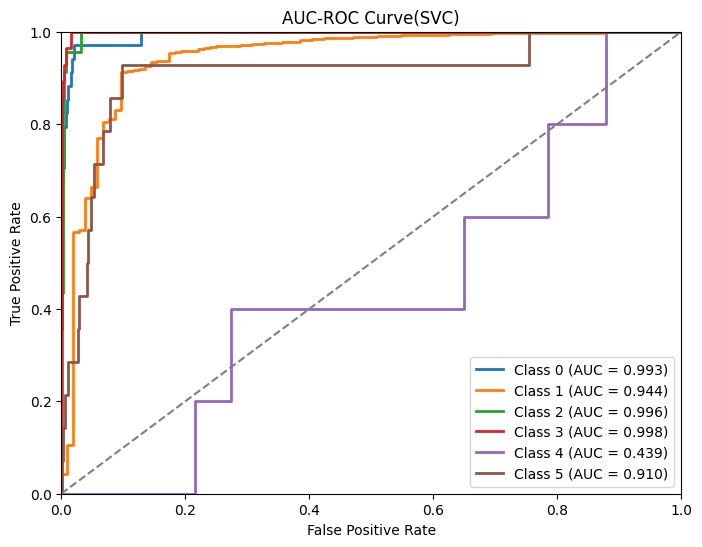

In [214]:
y_probs = svc.predict_proba(X_test)
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_probs[:,i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve(SVC)')
plt.legend(loc='lower right')

## SVC with AdaBoost

---



In [215]:
svc_adaBoost = AdaBoostClassifier(estimator=svc, n_estimators=10, learning_rate=1)

In [216]:
svc_adaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1, n_estimators=10)

In [217]:
y_pred_svc_adaboost = svc_adaBoost.predict(X_test)

In [218]:
print(classification_report(y_test, y_pred_svc_adaboost, zero_division=0))

              precision    recall  f1-score   support

           0       0.07      0.82      0.13        34
           1       0.98      0.39      0.55      2896
           2       0.15      0.30      0.20        23
           3       0.06      0.36      0.10        28
           4       0.00      0.00      0.00         5
           5       0.02      0.57      0.04        14

    accuracy                           0.39      3000
   macro avg       0.21      0.41      0.17      3000
weighted avg       0.95      0.39      0.54      3000



In [219]:
metrics = evaluate_multiclass(y_test, y_pred_svc_adaboost, y_probs)
print(metrics)

{'Accuracy': 0.3913333333333333, 'Precision (Macro)': 0.21258979897382382, 'Recall (Macro)': 0.40725571696370116, 'F1 Score (Macro)': 0.1698980419133884, 'ROC AUC Score (Macro)': np.float64(0.8801225283140983)}


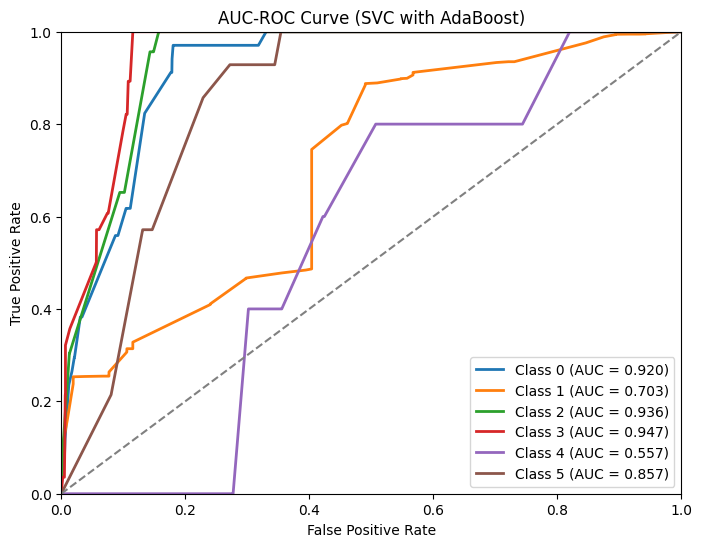

In [220]:
y_probs = svc_adaBoost.predict_proba(X_test)
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes = np.unique(y_test))
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (SVC with AdaBoost)')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5, random_state=101)

In [223]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=10, random_state=101)

In [224]:
y_pred_gbc = gbc.predict(X_test)

In [225]:
print(classification_report(y_test, y_pred_gbc, zero_division=0))

              precision    recall  f1-score   support

           0       0.54      0.94      0.69        34
           1       0.99      0.77      0.87      2896
           2       0.34      0.91      0.49        23
           3       0.62      1.00      0.77        28
           4       0.00      0.00      0.00         5
           5       0.07      0.50      0.12        14

    accuracy                           0.78      3000
   macro avg       0.43      0.69      0.49      3000
weighted avg       0.98      0.78      0.86      3000



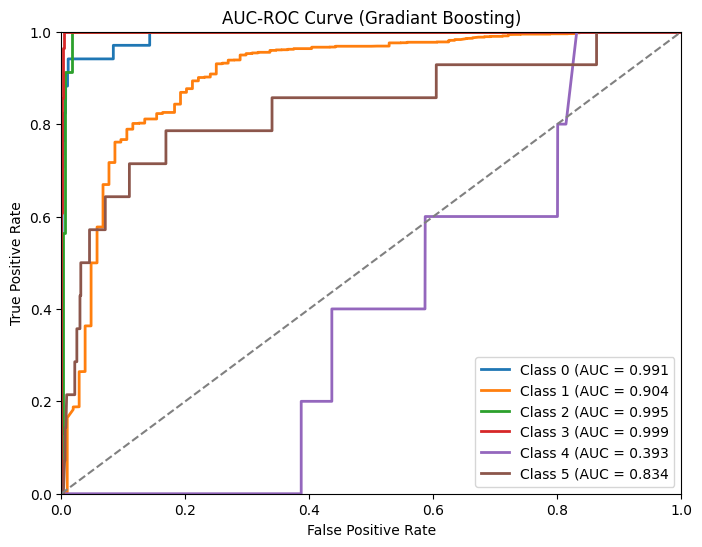

In [226]:
y_probs = gbc.predict_proba(X_test)
num_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes = np.unique(y_test))

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr,tpr, _ = roc_curve(y_test_bin[:,i], y_probs[:, i])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f}')


plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Gradiant Boosting)')
plt.legend(loc='lower right')
plt.show()

In [227]:
metrics = evaluate_multiclass(y_test, y_pred_gbc, y_probs)
print(metrics)

{'Accuracy': 0.7773333333333333, 'Precision (Macro)': 0.42733722798506596, 'Recall (Macro)': 0.6881803045503573, 'F1 Score (Macro)': 0.48953294280497267, 'ROC AUC Score (Macro)': np.float64(0.852781198398552)}


<Axes: >

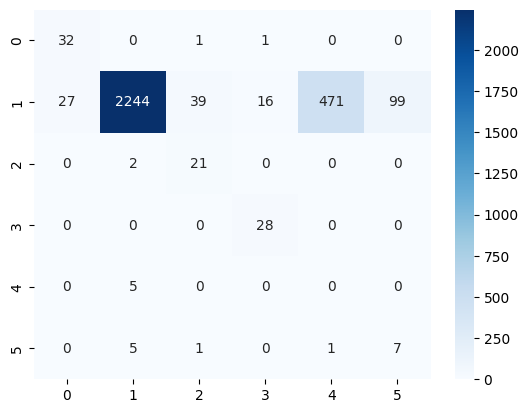

In [228]:
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

LightGBM

In [229]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [230]:
lgb_clf = lgb.LGBMClassifier(
    obective= 'multiclass',
    num_class= 6,

    boosting_type = 'gbdt',

    learning_rate = 0.1,
    max_dept = 3,
    n_estimators=100,


)

In [231]:
lgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 40578, number of used features: 5
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759


LGBMClassifier(max_dept=3, num_class=6, obective='multiclass')

In [232]:
y_pred_lgb = lgb_clf.predict(X_test)

[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [233]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.99      0.97      0.98      2896
           2       0.60      0.91      0.72        23
           3       0.79      0.93      0.85        28
           4       0.00      0.00      0.00         5
           5       0.13      0.29      0.18        14

    accuracy                           0.97      3000
   macro avg       0.57      0.67      0.61      3000
weighted avg       0.98      0.97      0.97      3000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: obective


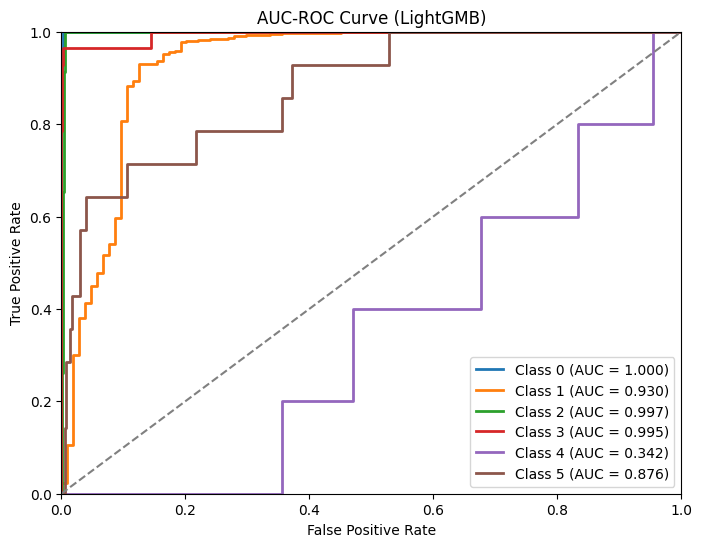

In [234]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = lgb_clf.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (LightGMB)")
plt.legend(loc="lower right")
plt.show()

In [235]:
metrics = evaluate_multiclass(y_test, y_pred_lgb, y_probs)
print(metrics)

{'Accuracy': 0.966, 'Precision (Macro)': 0.5709874401527932, 'Recall (Macro)': 0.6685782648394453, 'F1 Score (Macro)': 0.6087889862455319, 'ROC AUC Score (Macro)': np.float64(0.8565152928483336)}


<Axes: >

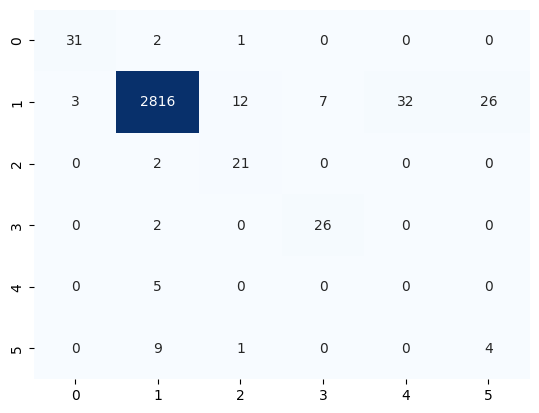

In [236]:
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

CatBoost

In [237]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [238]:
from catboost import CatBoostClassifier

In [239]:
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_seed=42
)

In [240]:
catboost_model.fit(X_train, y_train)

In [241]:
y_pred_cat = catboost_model.predict(X_test)

In [242]:
print(classification_report(y_test,y_pred_cat, zero_division=0))

              precision    recall  f1-score   support

           0       0.44      0.91      0.59        34
           1       1.00      0.83      0.91      2896
           2       0.34      1.00      0.51        23
           3       0.46      0.93      0.61        28
           4       0.00      0.00      0.00         5
           5       0.08      0.71      0.14        14

    accuracy                           0.84      3000
   macro avg       0.38      0.73      0.46      3000
weighted avg       0.97      0.84      0.89      3000



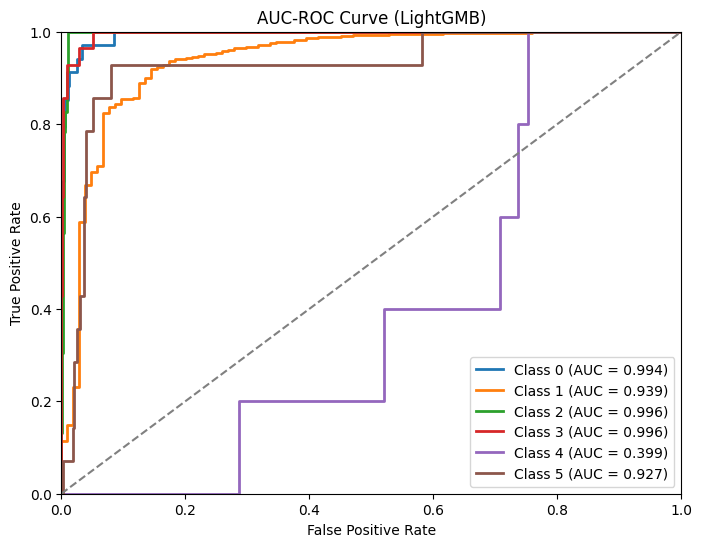

In [243]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = catboost_model.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (LightGMB)")
plt.legend(loc="lower right")
plt.show()

In [244]:
metrics = evaluate_multiclass(y_test, y_pred_cat, y_probs)
print(metrics)

{'Accuracy': 0.8353333333333334, 'Precision (Macro)': 0.38484653318436607, 'Recall (Macro)': 0.7314793320643175, 'F1 Score (Macro)': 0.45992561977402374, 'ROC AUC Score (Macro)': np.float64(0.8752244865872512)}


<Axes: >

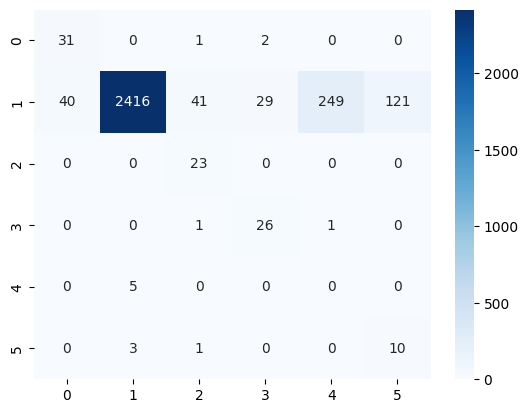

In [245]:
cm = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Stacking

---



In [246]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [247]:
base_models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

In [248]:
meta_model = LogisticRegression(random_state=42)

In [249]:
n_splits = 5

In [250]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [251]:
meta_features = np.zeros((X_train.shape[0], len(base_models)))

In [252]:
y_train = np.array(y_train)

Train base models using cross-validation and generate meta features

In [253]:
meta_features = np.zeros((X_train.shape[0], len(base_models)))
for i, (name, model) in enumerate(base_models):
    meta_feature_fold = np.zeros((X_train.shape[0],))
    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_fold_train, X_fold_valid = X_train[train_idx], X_train[valid_idx]
        y_fold_train, y_fold_valid = y_train[train_idx], y_train[valid_idx]

        model.fit(X_fold_train, y_fold_train)
        meta_feature_fold[valid_idx] = model.predict(X_fold_valid)

    meta_features[:, i] = meta_feature_fold

In [254]:
meta_model.fit(meta_features, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [255]:
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

In [256]:
for i, (name, model) in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_test[:, i] = model.predict(X_test)

In [257]:
y_pred_stack = meta_model.predict(meta_features_test)

In [258]:
print(classification_report(y_test, y_pred_stack, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        34
           1       0.99      0.97      0.98      2896
           2       0.40      0.78      0.53        23
           3       0.58      0.64      0.61        28
           4       0.00      0.00      0.00         5
           5       0.04      0.07      0.05        14

    accuracy                           0.95      3000
   macro avg       0.47      0.55      0.50      3000
weighted avg       0.97      0.95      0.96      3000



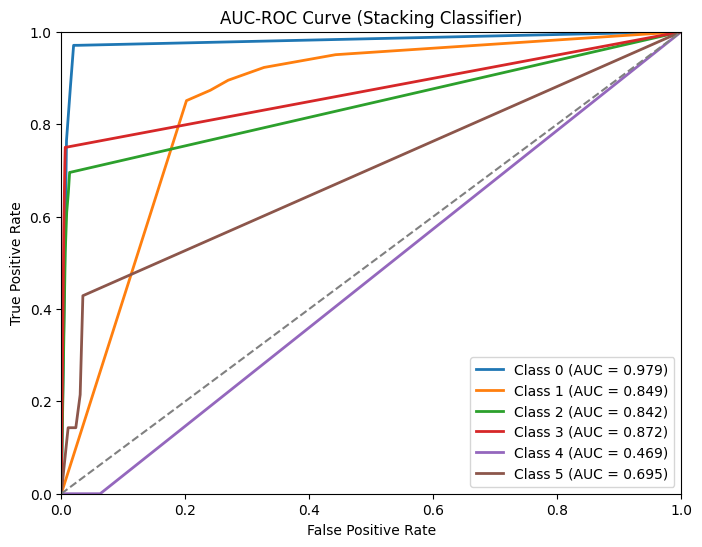

In [259]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = model.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Stacking Classifier)")
plt.legend(loc="lower right")
plt.show()

In [260]:
metrics = evaluate_multiclass(y_test, y_pred_stack, y_probs)
print(metrics)

{'Accuracy': 0.9533333333333334, 'Precision (Macro)': 0.4716617220631582, 'Recall (Macro)': 0.5475913551824766, 'F1 Score (Macro)': 0.4980288874396026, 'ROC AUC Score (Macro)': np.float64(0.7841894798436897)}


<Axes: >

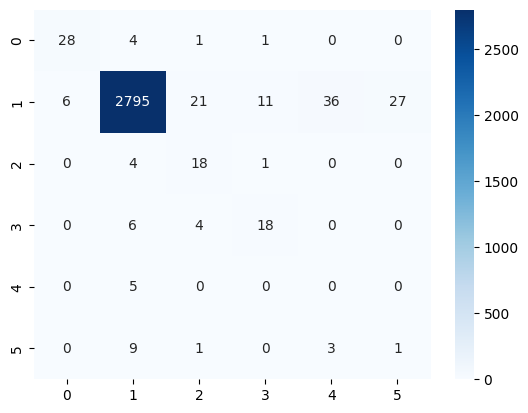

In [261]:
cm = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Voting

---



In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [263]:
log_clf = LogisticRegression(random_state=42)
svc_clf = SVC(probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)

In [264]:
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_clf),
        ('svc', svc_clf),
        ('dt', dt_clf),
        ('knn', knn_clf),
        ('rf', rf_clf)
    ],
    voting='soft'
)

In [265]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [266]:
for clf_name, clf in voting_clf.named_estimators_.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"{clf_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

log_reg Accuracy: 0.67
svc Accuracy: 0.80
dt Accuracy: 0.95
knn Accuracy: 0.89
rf Accuracy: 0.96


In [267]:
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test,y_pred_voting):.2f}")

Voting Classifier Accuracy: 0.93


In [268]:
print(classification_report(y_test,y_pred_voting,zero_division=0))

              precision    recall  f1-score   support

           0       0.51      0.94      0.66        34
           1       0.99      0.93      0.96      2896
           2       0.47      0.83      0.60        23
           3       0.78      0.89      0.83        28
           4       0.00      0.00      0.00         5
           5       0.08      0.36      0.13        14

    accuracy                           0.93      3000
   macro avg       0.47      0.66      0.53      3000
weighted avg       0.98      0.93      0.95      3000



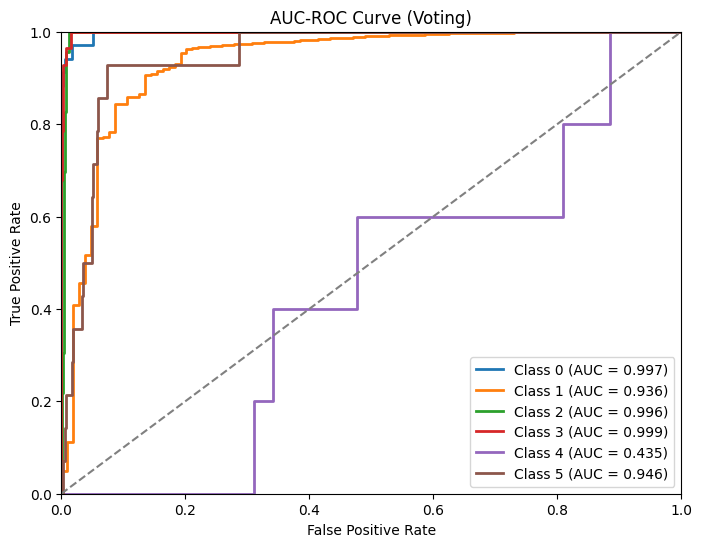

In [269]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = voting_clf.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Voting)")
plt.legend(loc="lower right")
plt.show()

In [270]:
metrics = evaluate_multiclass(y_test, y_pred_voting, y_probs)
print(metrics)

{'Accuracy': 0.9283333333333333, 'Precision (Macro)': 0.47297567849826533, 'Recall (Macro)': 0.658494180761423, 'F1 Score (Macro)': 0.5317215887702504, 'ROC AUC Score (Macro)': np.float64(0.884871121111887)}


<Axes: >

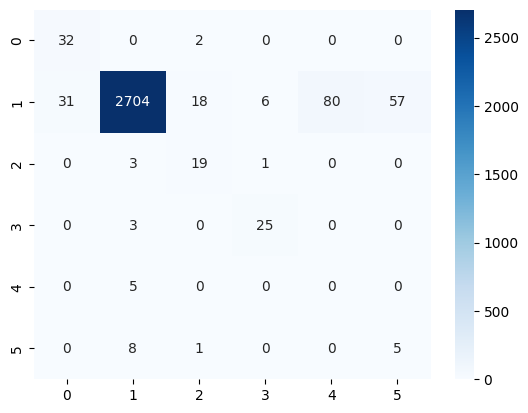

In [271]:
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Blending

---




In [272]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [273]:
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
svm = SVC(probability=True, class_weight="balanced", random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)

In [274]:
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [275]:
rf_train_pred = rf.predict_proba(X_train)
svm_train_pred = svm.predict_proba(X_train)
knn_train_pred = knn.predict_proba(X_train)

In [276]:
meta_X_train = np.hstack((rf_train_pred, svm_train_pred, knn_train_pred))

In [277]:
meta_model_blending = LGBMClassifier(n_estimators=100, random_state=42)

In [278]:
meta_model_blending.fit(meta_X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 40578, number of used features: 18
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

LGBMClassifier(random_state=42)

In [279]:
rf_test_pred = rf.predict_proba(X_test)
svm_test_pred = svm.predict_proba(X_test)
knn_test_pred = knn.predict_proba(X_test)

In [280]:
meta_X_test = np.hstack((rf_test_pred, svm_test_pred, knn_test_pred))

In [281]:
final_pred_blend = meta_model_blending.predict(meta_X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [282]:
print(classification_report(y_test, final_pred_blend))

              precision    recall  f1-score   support

           0       0.52      0.76      0.62        34
           1       0.99      0.96      0.98      2896
           2       0.55      0.74      0.63        23
           3       0.77      0.71      0.74        28
           4       0.00      0.00      0.00         5
           5       0.09      0.21      0.12        14

    accuracy                           0.95      3000
   macro avg       0.49      0.57      0.52      3000
weighted avg       0.97      0.95      0.96      3000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


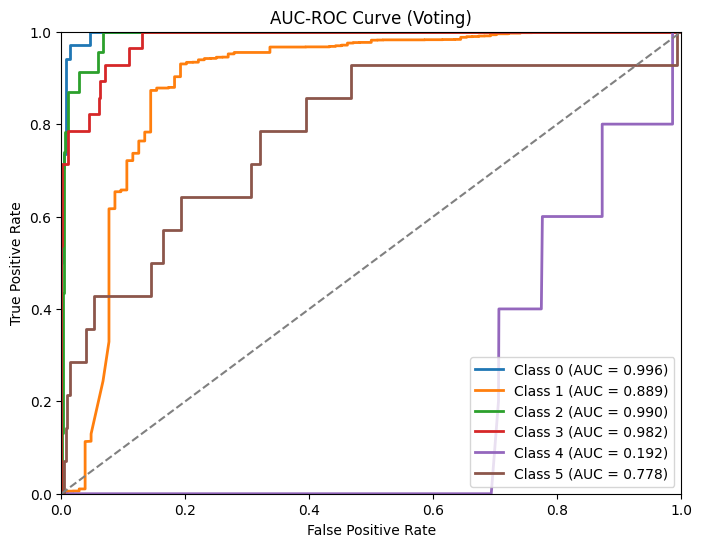

In [283]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = meta_model_blending.predict_proba(meta_X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve (Voting)")
plt.legend(loc="lower right")
plt.show()

In [284]:
metrics = evaluate_multiclass(y_test, final_pred_blend, y_probs)
print(metrics)

{'Accuracy': 0.9526666666666667, 'Precision (Macro)': 0.4855787574381923, 'Recall (Macro)': 0.566082690582839, 'F1 Score (Macro)': 0.5150216714263834, 'ROC AUC Score (Macro)': np.float64(0.8044681638835959)}


<Axes: >

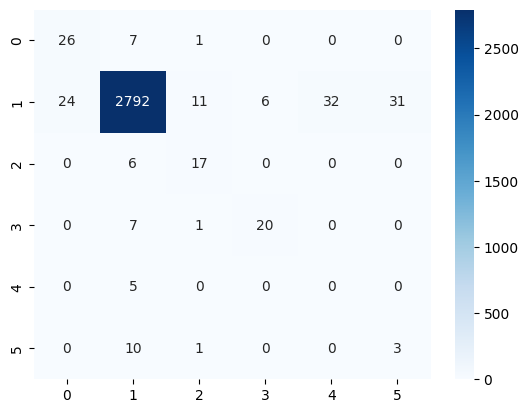

In [285]:
cm = confusion_matrix(y_test, final_pred_blend)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

### **XGB Classifier**

In [286]:
from xgboost import XGBClassifier

In [287]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))

In [288]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:35:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [289]:
xgb_pred = xgb.predict(X_test)

In [290]:
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.99      0.97      0.98      2896
           2       0.54      0.83      0.66        23
           3       0.79      0.96      0.87        28
           4       0.00      0.00      0.00         5
           5       0.10      0.29      0.15        14

    accuracy                           0.96      3000
   macro avg       0.55      0.66      0.59      3000
weighted avg       0.98      0.96      0.97      3000



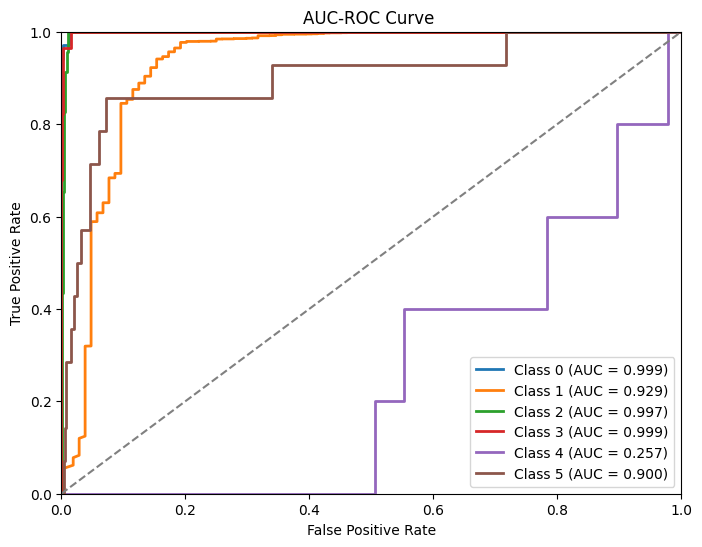

In [291]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
num_classes = y_test_bin.shape[1]

y_probs = xgb.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i in range(num_classes):
  fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.3f})')


plt.plot([0,1],[0,1], color="gray", linestyle="--")

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve ")
plt.legend(loc="lower right")
plt.show()

<Axes: >

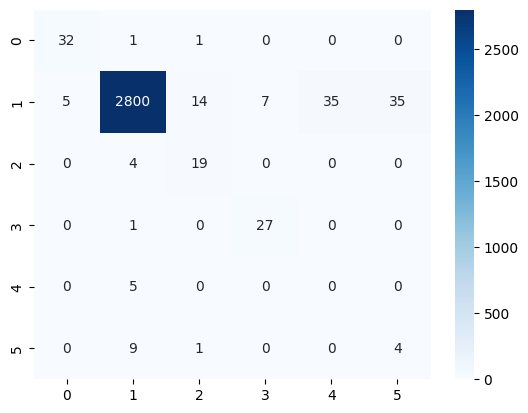

In [292]:
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [293]:
metrics = evaluate_multiclass(y_test, xgb_pred, y_probs)
print(metrics)

{'Accuracy': 0.9606666666666667, 'Precision (Macro)': 0.5495519264605623, 'Recall (Macro)': 0.6640190426398761, 'F1 Score (Macro)': 0.593033015138796, 'ROC AUC Score (Macro)': np.float64(0.846774747778095)}


### **Neural Network (ANN)**

In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

In [295]:

X_train.shape

(40578, 5)

In [296]:
Early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [297]:
model = Sequential()

In [298]:
model.add(Input(shape=(5, )))

In [299]:
model.add(Dense(29, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [300]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [301]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=600, callbacks=[Early_stop])

Epoch 1/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2571 - loss: 1.9519 - val_accuracy: 0.2880 - val_loss: 1.4788
Epoch 2/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4597 - loss: 1.3377 - val_accuracy: 0.5507 - val_loss: 1.1432
Epoch 3/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5546 - loss: 1.1200 - val_accuracy: 0.6527 - val_loss: 0.9452
Epoch 4/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6290 - loss: 0.9592 - val_accuracy: 0.5920 - val_loss: 0.9790
Epoch 5/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6588 - loss: 0.8646 - val_accuracy: 0.7153 - val_loss: 0.8896
Epoch 6/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6820 - loss: 0.8097 - val_accuracy: 0.6193 - val_loss: 0.9729
Epoch 7/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7038 - loss: 0.7605 - val_accuracy: 0.6037 - val_loss: 0.9494
Epoch 8/600
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7155 - loss: 0.7288 - val_accu

In [302]:

model_loss = pd.DataFrame(model.history.history)

<Axes: >

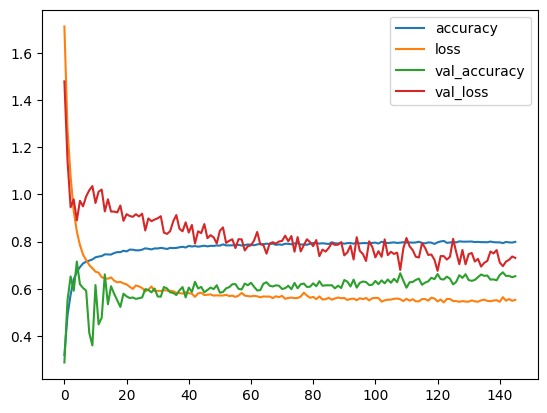

In [303]:
model_loss.plot()

In [304]:
predict = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [305]:
predict[0]

array([2.067262e-04, 6.134513e-01, 5.174815e-07, 2.565268e-04,
       3.859078e-01, 1.771787e-04], dtype=float32)

In [306]:
np.argmax(predict[0])

np.int64(1)

In [307]:
predict_label = [np.argmax(i) for i in predict]

In [308]:
print(classification_report(y_test, predict_label))

              precision    recall  f1-score   support

           0       0.30      0.88      0.45        34
           1       1.00      0.65      0.78      2896
           2       0.38      1.00      0.55        23
           3       0.46      1.00      0.63        28
           4       0.00      0.00      0.00         5
           5       0.06      0.71      0.11        14

    accuracy                           0.65      3000
   macro avg       0.37      0.71      0.42      3000
weighted avg       0.97      0.65      0.77      3000

